# Question 2: Sales Analysis Of Stores

> ### This report includes aggregate sales analysis, 
> ### based on monetary sales, quantity sold and average sales price.

<div class="alert alert-warning">
<b>Python Version 3.5+ : </b>Please create a virtual environment in Anaconda if needed.<br/>
<b>Note: </b>Please make sure that all the data analytics packages are installed appropriately.<br/> 
<b>Packages Used: </b>Numpy, Scipy, Pandas, Matplotlib, Seaborn, Statsmodels, Plotly<br/> 
</div>

## Sections
* [0. Goal](#0)
* [1. Dataset](#1)
* [2. Data Clean](#2)
* [3. Exploratory Data Analysis](#3)

***

<a id="0"></a>

## 0 Goal

* The goal of this assignment is to (1) clean sales data, (2) visualize aggregate sales analysis.
* In this assignment, I will clean data first, show the aggregate-level exploratory data analysis on important features and performance metrics, and then conduct aggregate store-level visualization. 

<a id="1"></a>

## 1 Dataset

<br><div class="btn-group"> 
    <a href="#overview" class="btn btn-success" role="button" style="text-decoration: none">Overview</a>
    <a href="#task" class="btn btn-warning" role="button" style="text-decoration: none">Tasks</a>
</div>

<a id="overview"></a>
#### Overview
* The file <b>`sales_table.csv`</b> contains total sales and total quantity sold for a sample of stores and items between year 1980 to 2019. 
* Please note that store id and item id are both unique across observations (although Item 302 has 2 observations). So this is not a real time series or panel data structure. However, in order to show visualization skills, I would rather choose to use time-series related visualization tools to treat them. 
* I will also create my own features, such as average sales price, weekend/weekday indicator, public-holiday month indicator, top/bottom/normal stores.<br/>

<a id="task"></a>
#### Tasks: Data Cleaning, Pre-processing and Visualization
* Data Cleaning
* Pre-processing and Exploratory Analysis
* Visualization

<a id="2"></a> 

## 2 Data Clean

In [1]:
#!/usr/bin/env python
#-*- coding:utf-8 -*-
from __future__ import division, print_function
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

<div class="alert alert-warning">
<b>Step 2.1: Load data into python pandas and named as "sales".</b>
</div>

In [2]:
%pwd
sales = pd.read_csv("./sales_table.csv", header=0)
print(sales.head(n=5))

   ItemID SalesDate  TotalSales  SoldQty  ShopID
0      16   23/1/04         723      356       0
1     834  11/11/15          68      741       1
2     413   14/5/12         773      654       2
3     601   21/3/19         999      681       3
4     210    9/6/97          25      469       4


In [3]:
# What are column types
print(sales.dtypes)

ItemID         int64
SalesDate     object
TotalSales     int64
SoldQty        int64
ShopID         int64
dtype: object


<div class="alert alert-warning">
<b>Step 2.2: Note that <code><b><i>SalesDate</i></b></code> is "object" type, instead of "date" type. So we need to transform to real date.</b> 
</div>

In [4]:
# Original "SalesDate" is in "dd-mm-yy" format, but real Date is from 1980 until 2019
# So if "yy" is between [80, 99], then transform to 19**; If "yy" is between [0, 19], then transform to 20**
new_date = sales["SalesDate"].str.split("/", expand=True)
sales["day"] = new_date[0].astype('int32')
sales["month"] = new_date[1].astype('int32')
sales["year"] = new_date[2].map(lambda x: '19' + x if 80 <= int(x) <= 99 else '20' + x).astype('int64')

# Create a new date column: datetime type 
sales["Date"] = pd.to_datetime(sales[['year','month','day']])

In [5]:
# Now the date column is correct in its type
print(sales.dtypes)

ItemID                 int64
SalesDate             object
TotalSales             int64
SoldQty                int64
ShopID                 int64
day                    int32
month                  int32
year                   int64
Date          datetime64[ns]
dtype: object


<div class="alert alert-warning">
<b>Step 2.3: Prepare some important time variables, such as: </b>
    <ul>
        <li> week-day of this date: Sun, Mon, Tue, ...</li>
        <li> whether this is weekend </li>
        <li> whether this is in the month of major public holiday: Because usually promotion lasts for one month before/after public holiday </li>    
    </ul>
</div>

In [6]:
# Weekday and Weekend
weekday_map = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
sales["weekday"] = sales["Date"].dt.weekday.map(weekday_map) # Which day-of-week is this date
sales["weekend"] = sales["weekday"].map(lambda x: 1 if x in ["Sat", "Sun"] else 0) # Whether this is weekend? 1: weekend, 0: not weekend

In [7]:
# Public holiday from 1980-2019
# For simplicity, I only consider 4 major public holidays in which sales are likely boosted greatly, instead of others and non-public holidays
# These public holidays are: Christmas, New_Year, Chinese_New_Year, Deepavali
# Data are crawled from: https://www.timeanddate.com/holidays/singapore/
# 1. Christmas Promotion: December
# 2. New_Year Promotion: December and January
# 3. Chinese_New_Year: Early February
# 4. Deepavali: October and November
# 5. Normal_Day: Assume other months have no monthly level promotions
Holiday_Promotion = {12:"Christmas_Promotion", 1:"NewYear_Promotion", 2:"ChineseNY_Promotion", 10:"Deepavali_Promotion", 11:"Deepavali_Promotion"}
sales["Holiday_Promotion"] = sales["month"].map(Holiday_Promotion)
sales["Holiday_Promotion"] = sales["Holiday_Promotion"].map(lambda x: "Normal_Day" if pd.isna(x) else x)
sales["Is_Holiday_Month"] = sales["Holiday_Promotion"].map(lambda x: 0 if x=="Normal_Day" else 1)

In [8]:
# Sort by date
sales.sort_values(by=["Date"], inplace=True)

<div class="alert alert-warning">
<b>Step 2.4: Average Sales Price </b>
</div>

In [9]:
sales["AvgSalesPrice"] = sales["TotalSales"] / sales["SoldQty"]

In [10]:
print(sales.head(n=5))

    ItemID SalesDate  TotalSales  SoldQty  ShopID  day  month  year  \
8      228    1/1/80         403      603       8    1      1  1980   
44     644   18/2/80          22       66      44   18      2  1980   
43       9   13/8/80           6      742      43   13      8  1980   
15     392  21/11/80         232      839      15   21     11  1980   
39     856    4/3/82         523      735      39    4      3  1982   

         Date weekday  weekend    Holiday_Promotion  Is_Holiday_Month  \
8  1980-01-01     Tue        0    NewYear_Promotion                 1   
44 1980-02-18     Mon        0  ChineseNY_Promotion                 1   
43 1980-08-13     Wed        0           Normal_Day                 0   
15 1980-11-21     Fri        0  Deepavali_Promotion                 1   
39 1982-03-04     Thu        0           Normal_Day                 0   

    AvgSalesPrice  
8        0.668325  
44       0.333333  
43       0.008086  
15       0.276520  
39       0.711565  


<div class="alert alert-warning">
<b>Step 2.5: Descriptive Analysis and Correlation Tables of major features: </b>
</div>

In [11]:
# Descriptive analysis: Mean, Median, Std, Quantile
Features = ["TotalSales","SoldQty","AvgSalesPrice","weekend","Is_Holiday_Month"]
sales[Features].describe()

,TotalSales,SoldQty,AvgSalesPrice,weekend,Is_Holiday_Month
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,459.100000,515.820000,1.252384,0.260000,0.460000
std,315.654568,242.250729,1.318950,0.443087,0.503457
min,6.000000,66.000000,0.007772,0.000000,0.000000
25%,156.000000,318.250000,0.334529,0.000000,0.000000
50%,475.500000,500.000000,0.906541,0.000000,0.000000
75%,721.250000,726.750000,1.446936,0.750000,1.000000
max,999.000000,976.000000,5.980645,1.000000,1.000000


'''
#### Findings: 
#### (1) About 26% of observations are within weekend.
#### (2) About 46% of observations are within public-holiday monthly promotion period.
'''

In [12]:
# Correlation Tables
import seaborn as sns
correlation = sales[Features].corr()
print(correlation)

                  TotalSales   SoldQty  AvgSalesPrice   weekend  \
TotalSales          1.000000 -0.148492       0.702959  0.145872   
SoldQty            -0.148492  1.000000      -0.596899 -0.374680   
AvgSalesPrice       0.702959 -0.596899       1.000000  0.336792   
weekend             0.145872 -0.374680       0.336792  1.000000   
Is_Holiday_Month   -0.072082  0.083354      -0.108126  0.093315   

                  Is_Holiday_Month  
TotalSales               -0.072082  
SoldQty                   0.083354  
AvgSalesPrice            -0.108126  
weekend                   0.093315  
Is_Holiday_Month          1.000000  


Text(0.5, 1.0, 'Correlation Table')

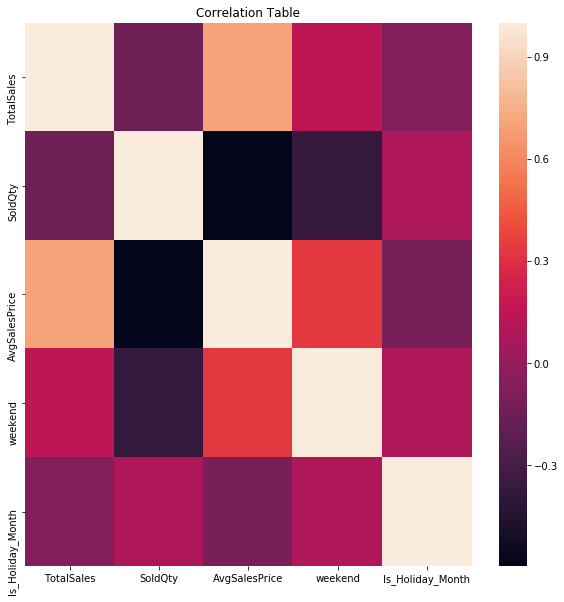

In [13]:
plt.figure(figsize=(10,10))
ax = sns.heatmap(correlation)
ax.set_title("Correlation Table")

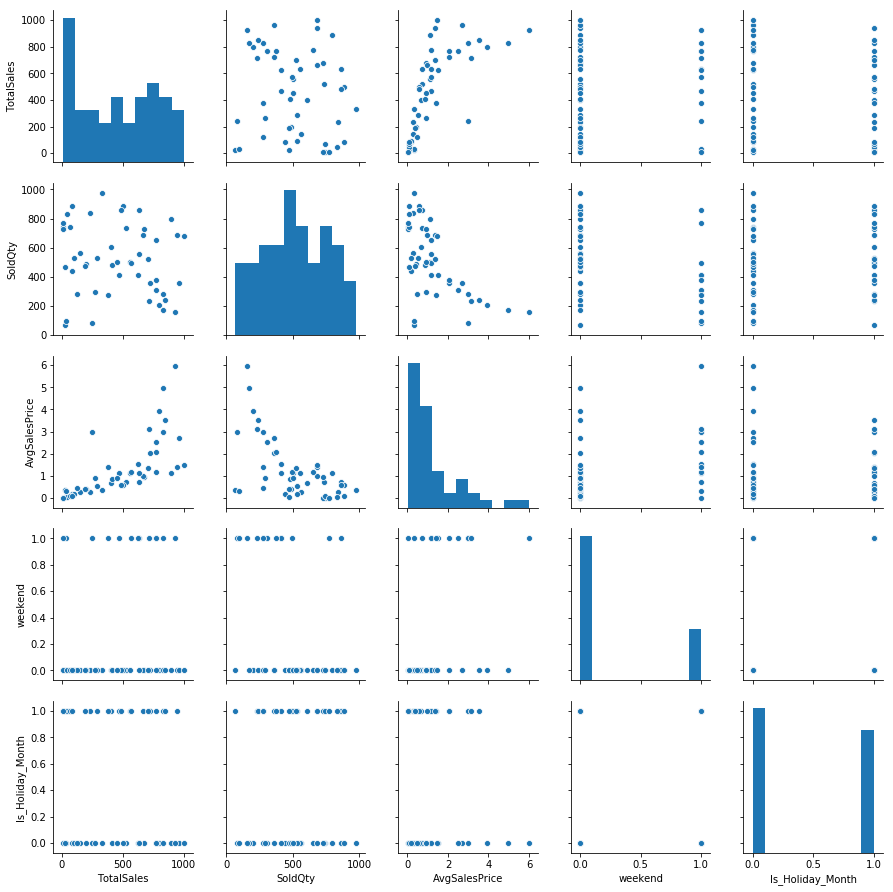

In [14]:
# Scatterplots of performance metrics: TotalSales, SoldQty, AvgSalesPrice
ax = sns.pairplot(sales[Features])

'''
#### Findings: 
#### (1) SoldQty and AvgSalesPrice is negatively correlated (about -0.6), which is very reasonable. If price is higher, then people buy less quantity.
#### (2) weekend is positively correlated with TotalSales (about 0.146), which means people spend more money during weekend, and this is also reasonable. But weekend is negatively correlated with SoldQty (about -0.375), the possible reason is: during weekend, people prefer to buy more higher-priced items but not lower-priced items, so that TotalSales is higher while SoldQty may be lower. This is supported by the positive correlation between weekend and AvgSalesPrice (about 0.337). 
#### (3) On the contrary, Is_Holiday_Month is negatively correlated with TotalSales (about -0.072), but positively correlated with SoldQty (about 0.083), meaning that during public-holiday promotion month, people may prefer to buy more lower-priced items, instead of higher-priced items, so that TotalSales is lower but SoldQty is higher. This is supported by the negative correlation between Is_Holiday_Month and AvgSalesPrice (about -0.108).
#### (4) Note that whether correlations are statistically significant or not should be further conducted by Pearson correlation test under 5% significance level. I do not show that because only visualization is required in this assignment.
'''

<div class="alert alert-warning">
<b>Step 2.6: How performance metrics differ during (1) weekend v.s. non-weekend, and (2) public-holiday promotion month v.s. non-public-holiday promotion month: </b>
</div>

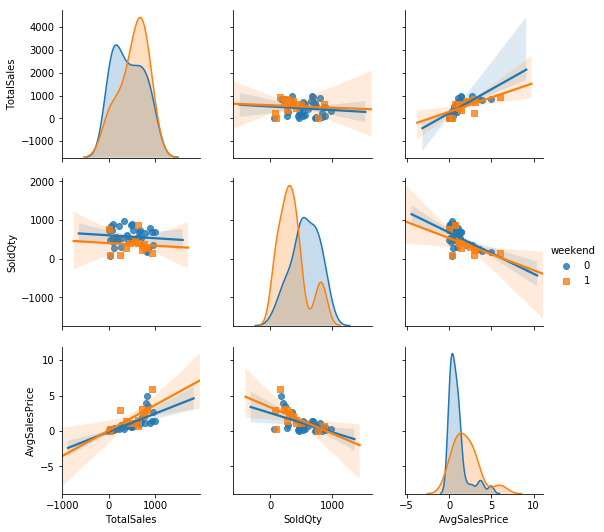

In [15]:
# weekend v.s. non-weekend
sns.pairplot(sales[Features], hue='weekend', diag_kind='kde', markers=['o','s'], vars=["TotalSales","SoldQty","AvgSalesPrice"], kind="reg")

'''
#### Findings:
#### Looking at Figure row 1 column 3 and Figure row 2 column 3 (Scatter plots): 
#### (1) When average sales price is increasing, total sales is also increasing but quantity sold is decreasing. 
#### (2) During weekend (i.e., weekend=1), one unit reduction in average sales price will result in less reduction in total sales and less increase in quantity sold, compared with during non-weekend (i.e., weekend=0). 
#### (3) Therefore, promotion on price during non-weekend may be more beneficial than that during weekend, because more items can be sold.

'''

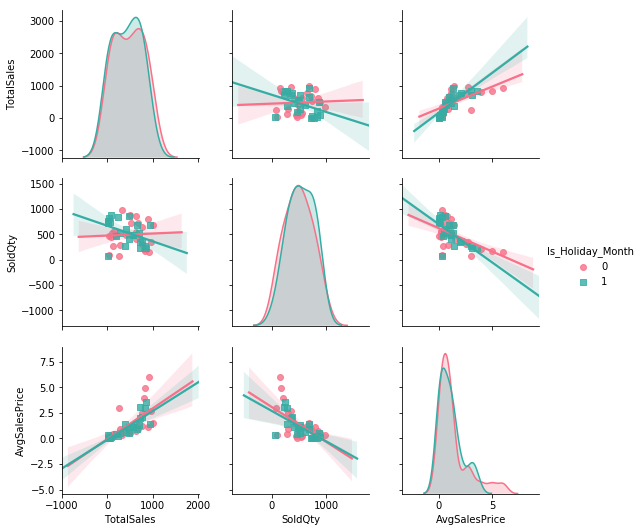

In [16]:
# public-holiday v.s. non-public-holiday
sns.pairplot(sales[Features], hue='Is_Holiday_Month', diag_kind='kde', markers=['o','s'], palette="husl", vars=["TotalSales","SoldQty","AvgSalesPrice"], kind="reg")

'''
#### Findings:
#### Looking at Figure row 1 column 3 and Figure row 2 column 3 (Scatter plots): 
#### (1) When average sales price is increasing, total sales is also increasing but quantity sold is decreasing. This is equivalent to the findings above.
#### (2) During holiday month (i.e., Is_Holiday_Month=1), one unit reduction in average sales price will result in more reduction in total sales and more increase in quantity sold, compared with during non-holiday-month (i.e., Is_Holiday_Month=0). 
#### (3) Therefore, promotion on price during holiday month may be more beneficial than that during non-holiday-month, because more items can be sold.
'''

<div class="alert alert-warning">
<b>Step 2.7: Univariate distribution of performance metrics (Showing histograms): </b>
</div>

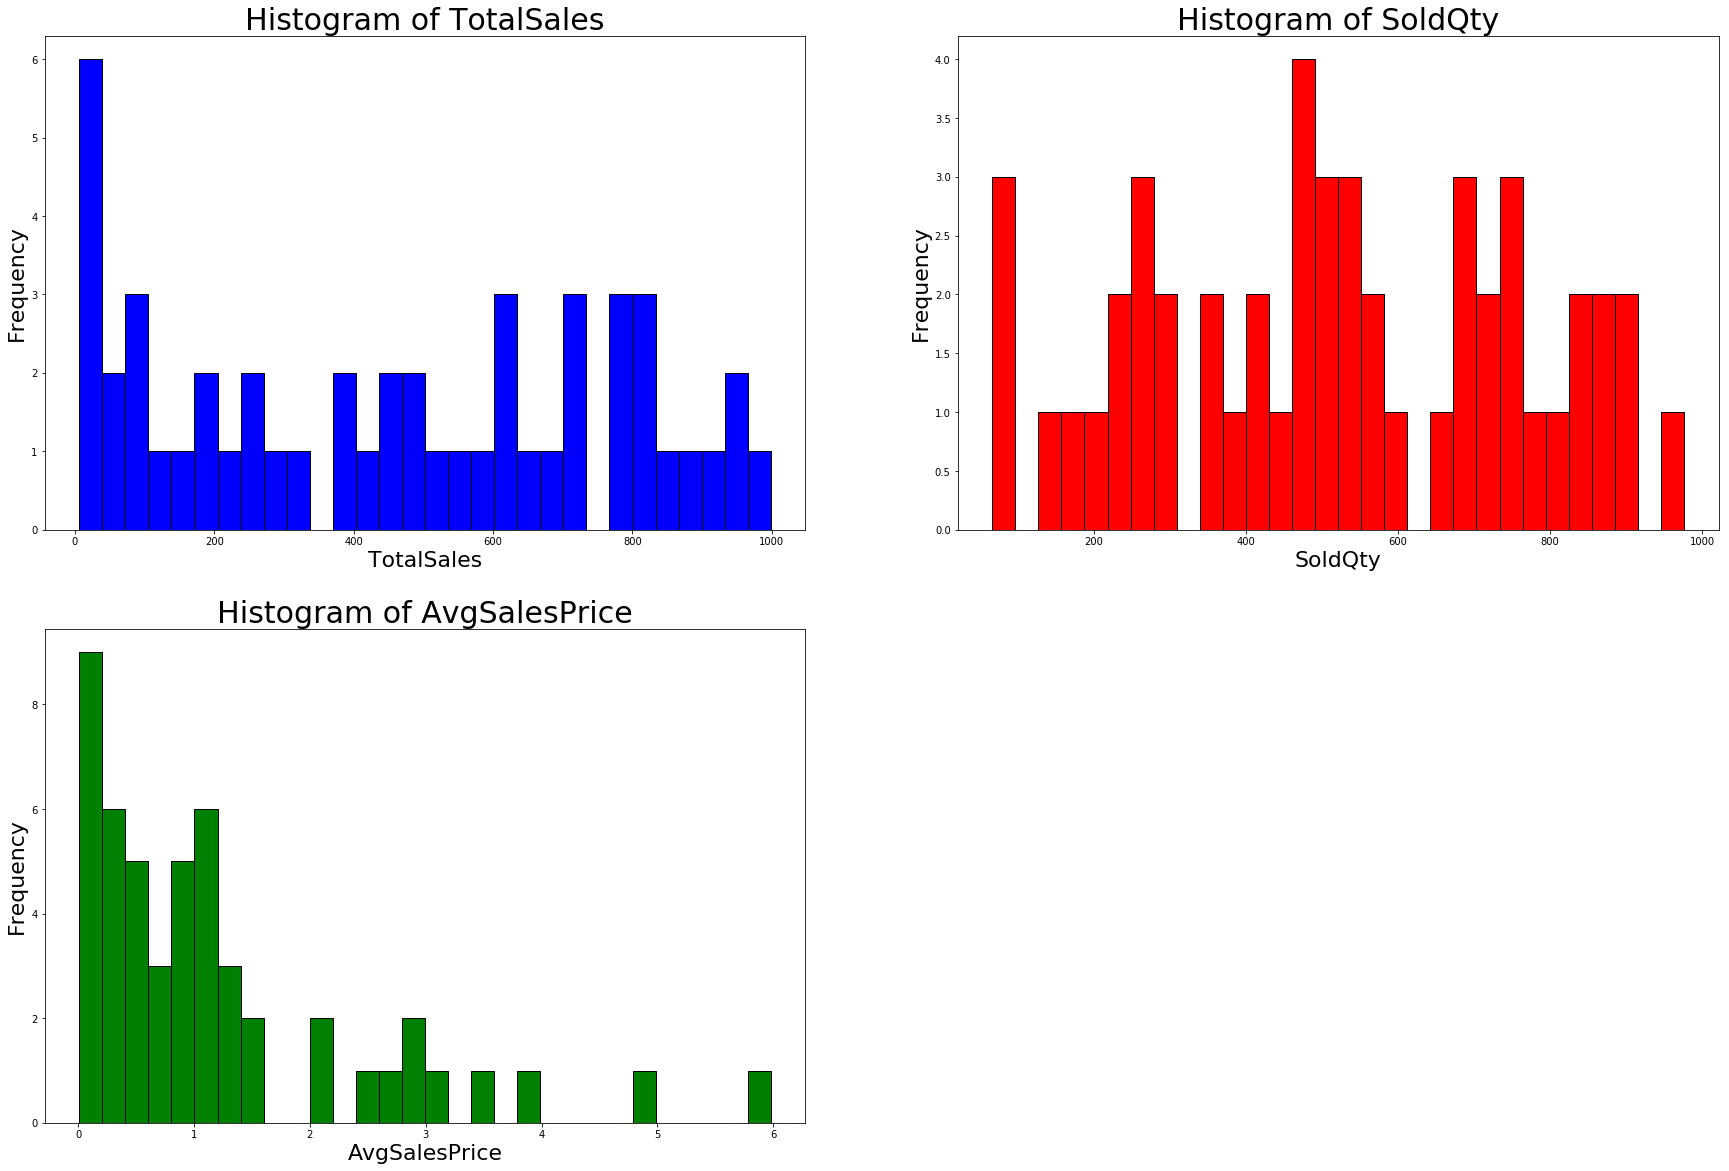

In [17]:
# Univariate distribution of TotalSales, SoldQty, AvgSalesPrice
plt.figure(figsize=(30,20))
colors = ['blue','red','green']
for i, performance in enumerate(['TotalSales','SoldQty','AvgSalesPrice']):
    
    # Set up the plot
    ax = plt.subplot(2, 2, i + 1)
    
    # Draw the plot
    ax.hist(sales[performance], bins = 30,
             color = colors[i], edgecolor = 'black')
    
    # Title and labels
    ax.set_title('Histogram of %s' % performance, size = 30)
    ax.set_xlabel(performance, size = 22)
    ax.set_ylabel('Frequency', size= 22)

plt.show()

'''
#### Findings:
#### Apparently, the total sales of most stores are below 800, number of items sold are mostly below 700, and most of the stores are selling lower-priced items (with average sales price lower than 2).

'''

In [18]:
# Save a copy for backup
from copy import deepcopy
sales_backup = deepcopy(sales)

<a id="3"></a>

## 3 Exploratory Data Analysis

<div class="alert alert-success">
<b>Step 3.1: Sales Trend: What are the monthly and yearly total sales and average sales by store? Is there any trend, seasonality, or cyclicality, heteroskedasticity, or autocorrelation?</b>
</div>

In [19]:
# Create year-month date column
sales_store = deepcopy(sales)
sales_store["DateByMonth"] = sales_store["year"].apply(str) + "-" + sales_store["month"].apply(str)

In [20]:
# Mean aggregation of store sales by month and by year
column_names = {"TotalSales":{"AverageSales":np.mean, "TotalSales":np.sum}}
store_sales_month = sales_store[["DateByMonth","TotalSales"]].groupby(["DateByMonth"], as_index=False).agg(column_names)
store_sales_year = sales_store[["year","TotalSales"]].groupby(["year"], as_index=False).agg(column_names)

# Remove hierarchical index after aggregation
store_sales_month.columns = [index2 if index2 else index1 for index1, index2 in store_sales_month.columns]
store_sales_year.columns = [index2 if index2 else index1 for index1, index2 in store_sales_year.columns]

D:\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


<Figure size 2160x720 with 0 Axes>

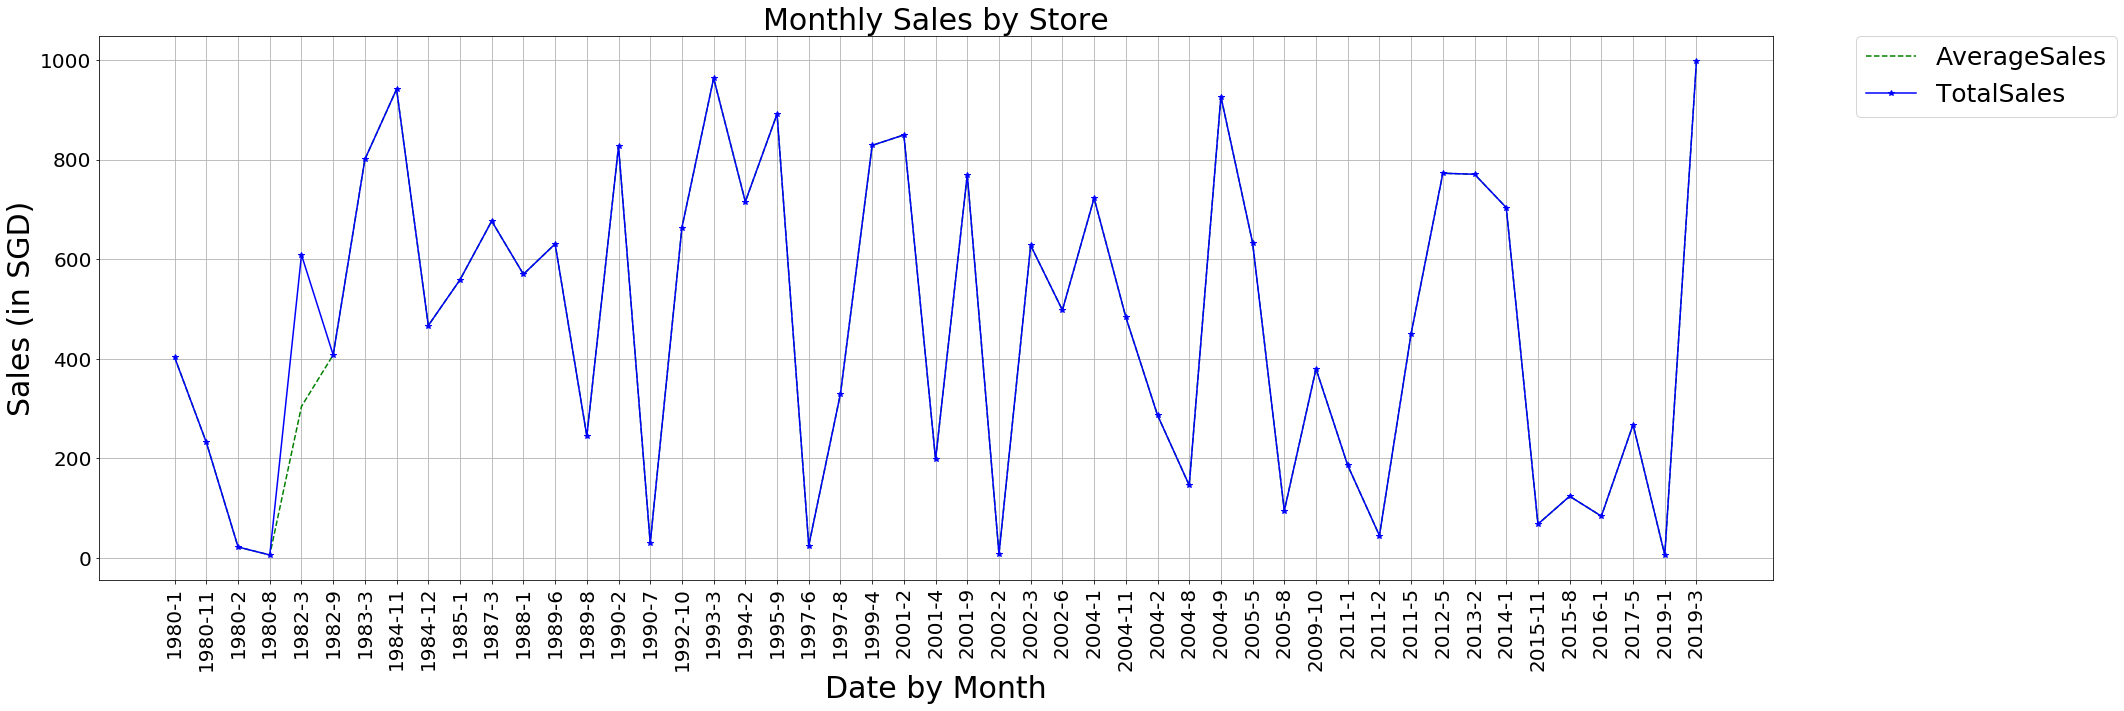

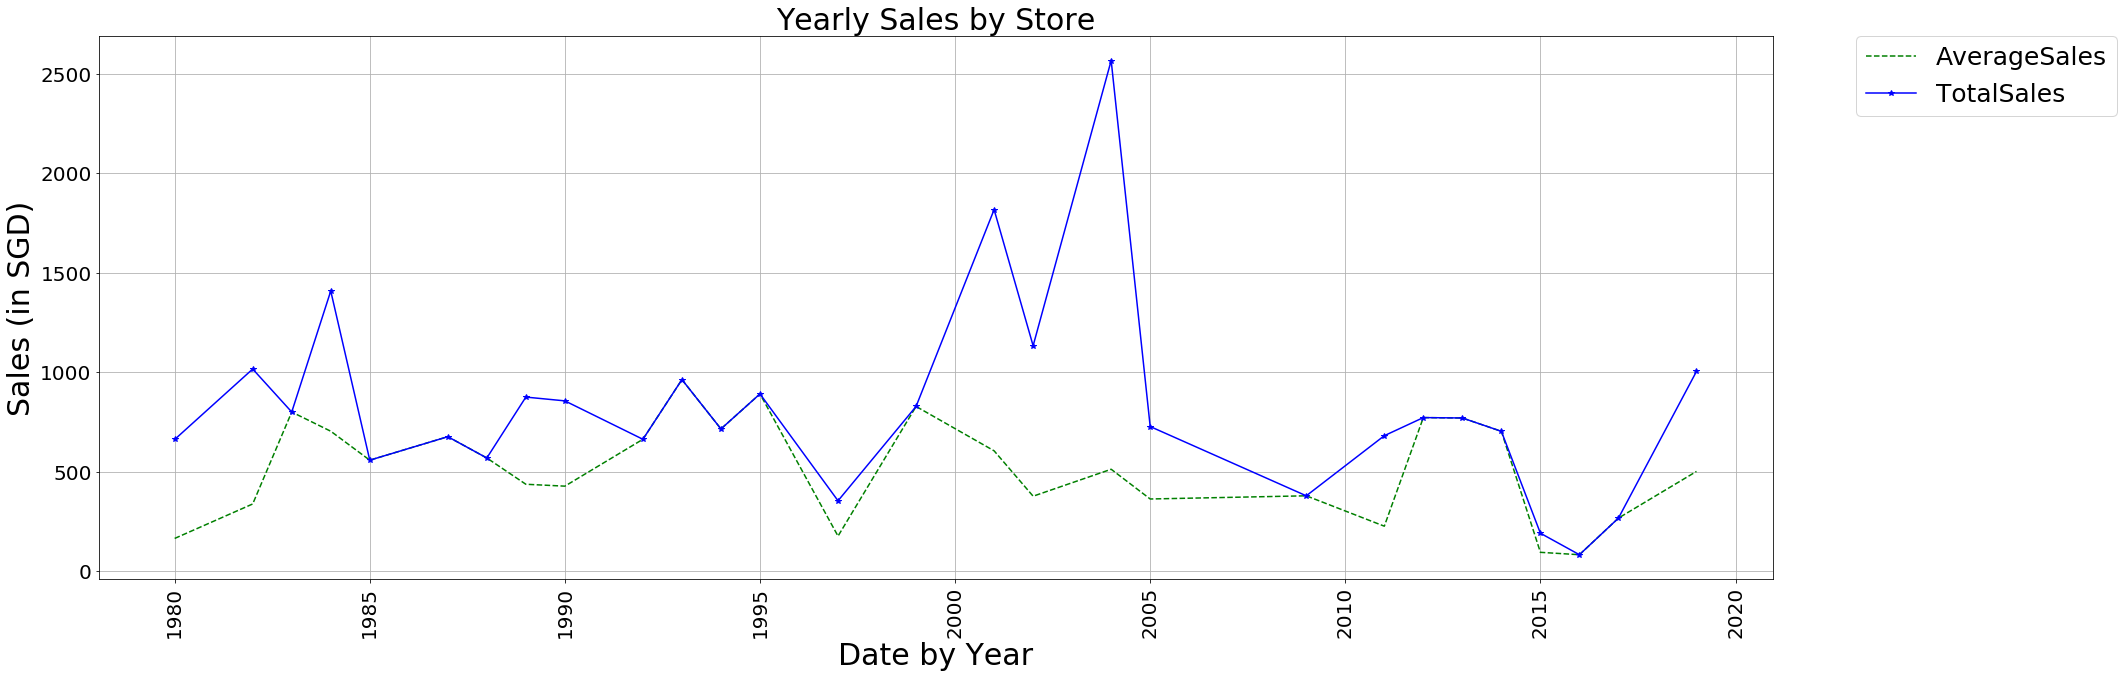

In [21]:
# Time series plot 
plt.figure(figsize=(30,10))
titles = ['Monthly Sales by Store', 'Yearly Sales by Store']
xlabels = ['Date by Month', 'Date by Year']
for i, dataset in enumerate([store_sales_month, store_sales_year]):
    
    plt.figure(figsize=(30,10))
    plt.grid(True)
    plt.plot(dataset.iloc[:,0], dataset.iloc[:,1], 'g--', label='AverageSales')
    plt.plot(dataset.iloc[:,0], dataset.iloc[:,2], 'b-*', label='TotalSales')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=25)
    plt.title(titles[i], size=30)
    plt.ylabel('Sales (in SGD)', size=30)
    plt.xlabel(xlabels[i], size=30)
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()


'''
#### Findings:
#### Looking at 1st Figure: Monthly Sales by Store: 
#### (1) We can find an obvious cyclical peak around February to March. This shows seasonality. The possible reason is that February and March is near Chinese New Year promotional month.
#### Looking at 1st Figure: Yearly Sales by Store: 
#### (1) Yearly trend of average sales is rather stable, but total sales trend is unstable. 
#### We have to use time-series decomposion visualization technique. I show them in the next block.
'''

D:\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


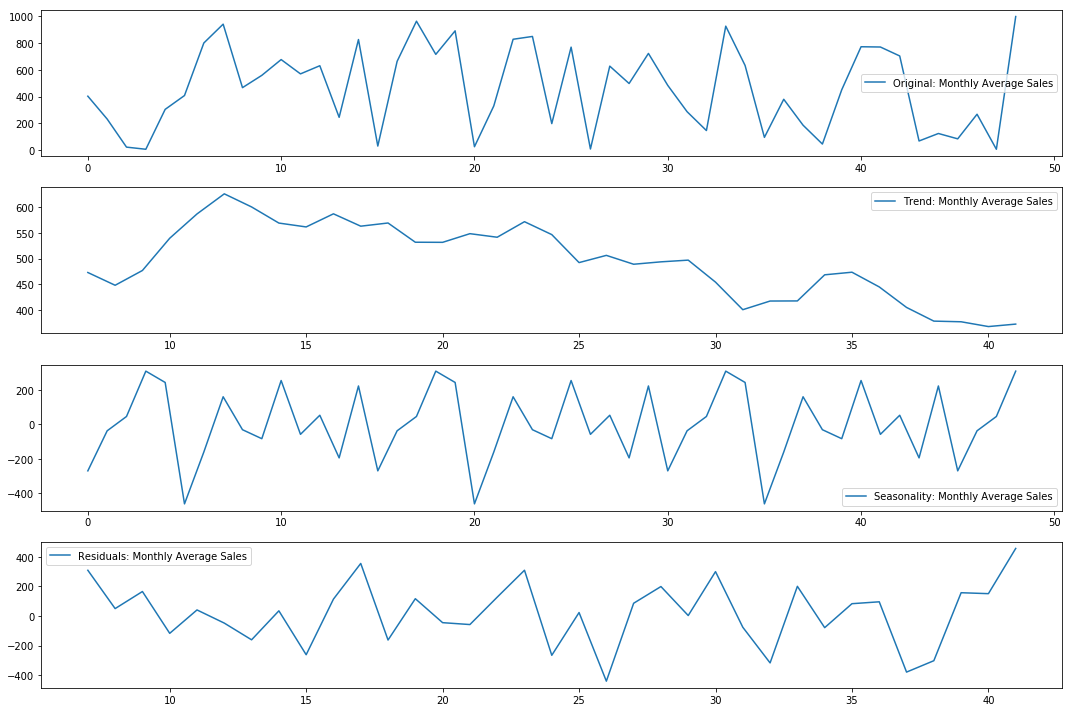

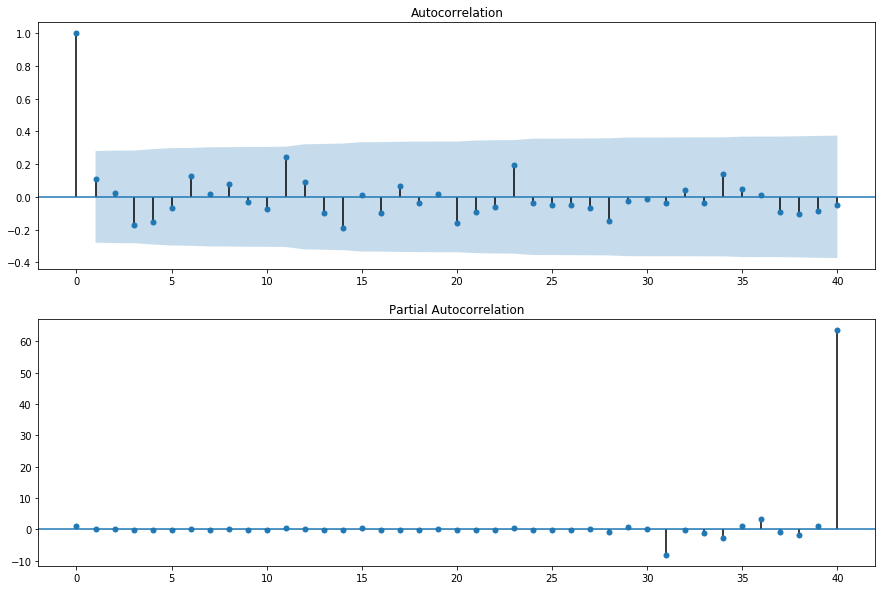

In [22]:
# Decomposition of monthly average sales data
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(list(store_sales_month['AverageSales']), freq=15)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(15,10))
plt.title("Decomposition of Monthly Average Sales")
plt.subplot(411)
plt.plot(store_sales_month['AverageSales'], label='Original: Monthly Average Sales')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend: Monthly Average Sales')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality: Monthly Average Sales')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals: Monthly Average Sales')
plt.legend(loc='best')
plt.tight_layout()

plt.figure(figsize=(15,10))
ax1 = plt.subplot(211)
fig = sm.graphics.tsa.plot_acf(store_sales_month['AverageSales'].squeeze(), lags=40, ax=ax1)
ax2 = plt.subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_sales_month['AverageSales'].squeeze(), lags=40, ax=ax2)

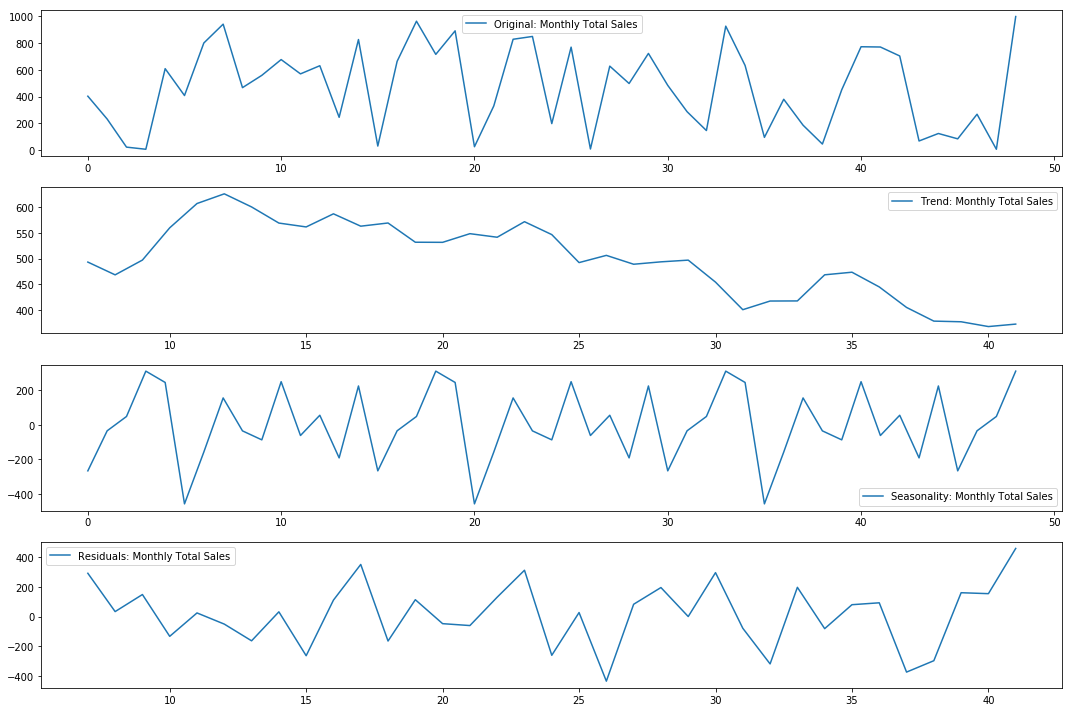

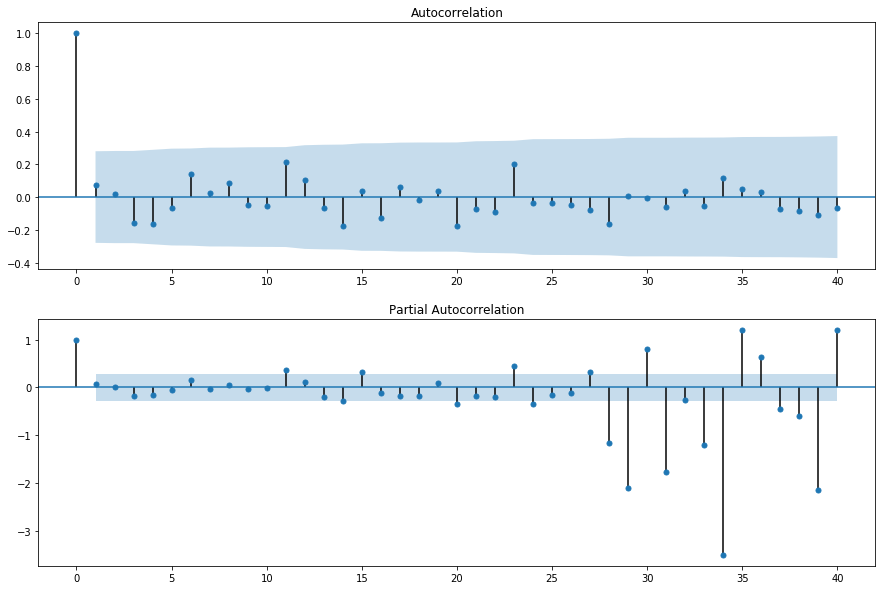

In [23]:
# Decomposition of monthly total sales data
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(list(store_sales_month['TotalSales']), freq=15)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(15,10))
plt.title("Decomposition of Monthly Total Sales")
plt.subplot(411)
plt.plot(store_sales_month['TotalSales'], label='Original: Monthly Total Sales')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend: Monthly Total Sales')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality: Monthly Total Sales')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals: Monthly Total Sales')
plt.legend(loc='best')
plt.tight_layout()

plt.figure(figsize=(15,10))
ax1 = plt.subplot(211)
fig = sm.graphics.tsa.plot_acf(store_sales_month['TotalSales'].squeeze(), lags=40, ax=ax1)
ax2 = plt.subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_sales_month['TotalSales'].squeeze(), lags=40, ax=ax2)

'''
#### Findings:
#### The shape of monthly average sales data and monthly total sales data are almost the same, because in this raw dataset, there is almost no repeated observations for each item or each store: 
#### (1) The seasonality is very obvious, the same pattern will repeat every 12 months, so it means 12-month is a cyclic period.
#### (2) I cannot make claim on growing trend, because the data is not complete.
#### (3) Autocorrelation in lag values is not significant.
#### (4) Heteroskedasticity (i.e., changing variance) is not obvious in this case.
'''

<div class="alert alert-success">
<b>Step 3.2: Quantity Trend: What are the monthly and yearly total quantity and average quantity by store? Is there any trend, seasonality, or cyclicality, heteroskedasticity, or autocorrelation?</b>
</div>

D:\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning: using a dict with renaming is deprecated and will be removed in a future version
  return super(DataFrameGroupBy, self).aggregate(arg, *args, **kwargs)


<Figure size 2160x720 with 0 Axes>

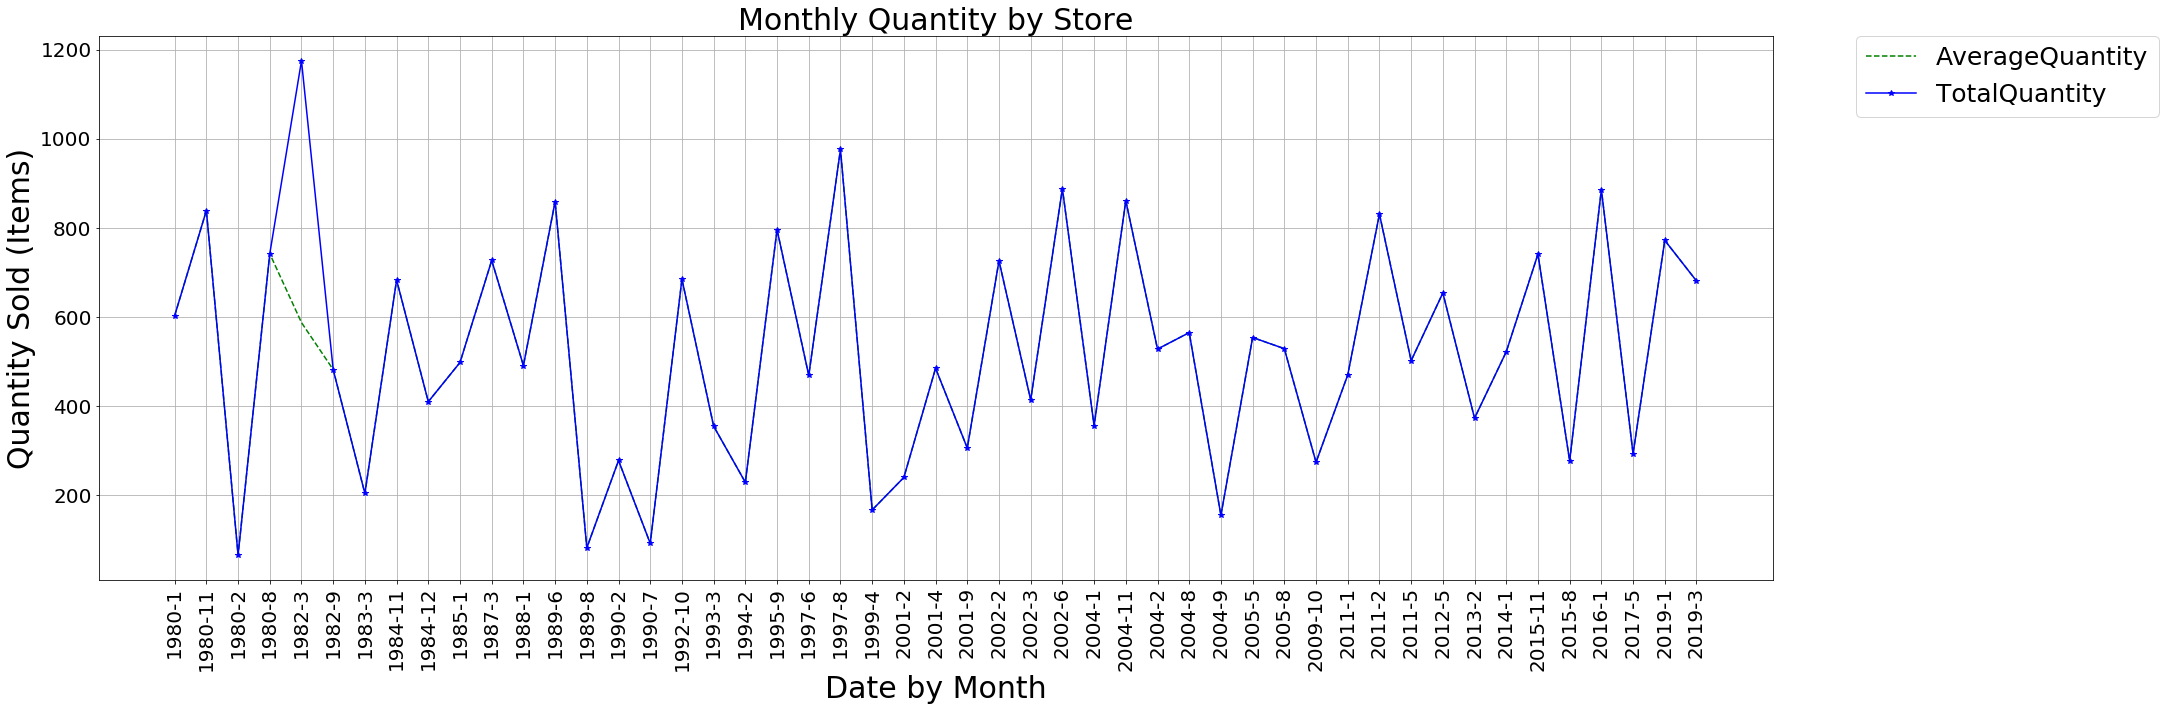

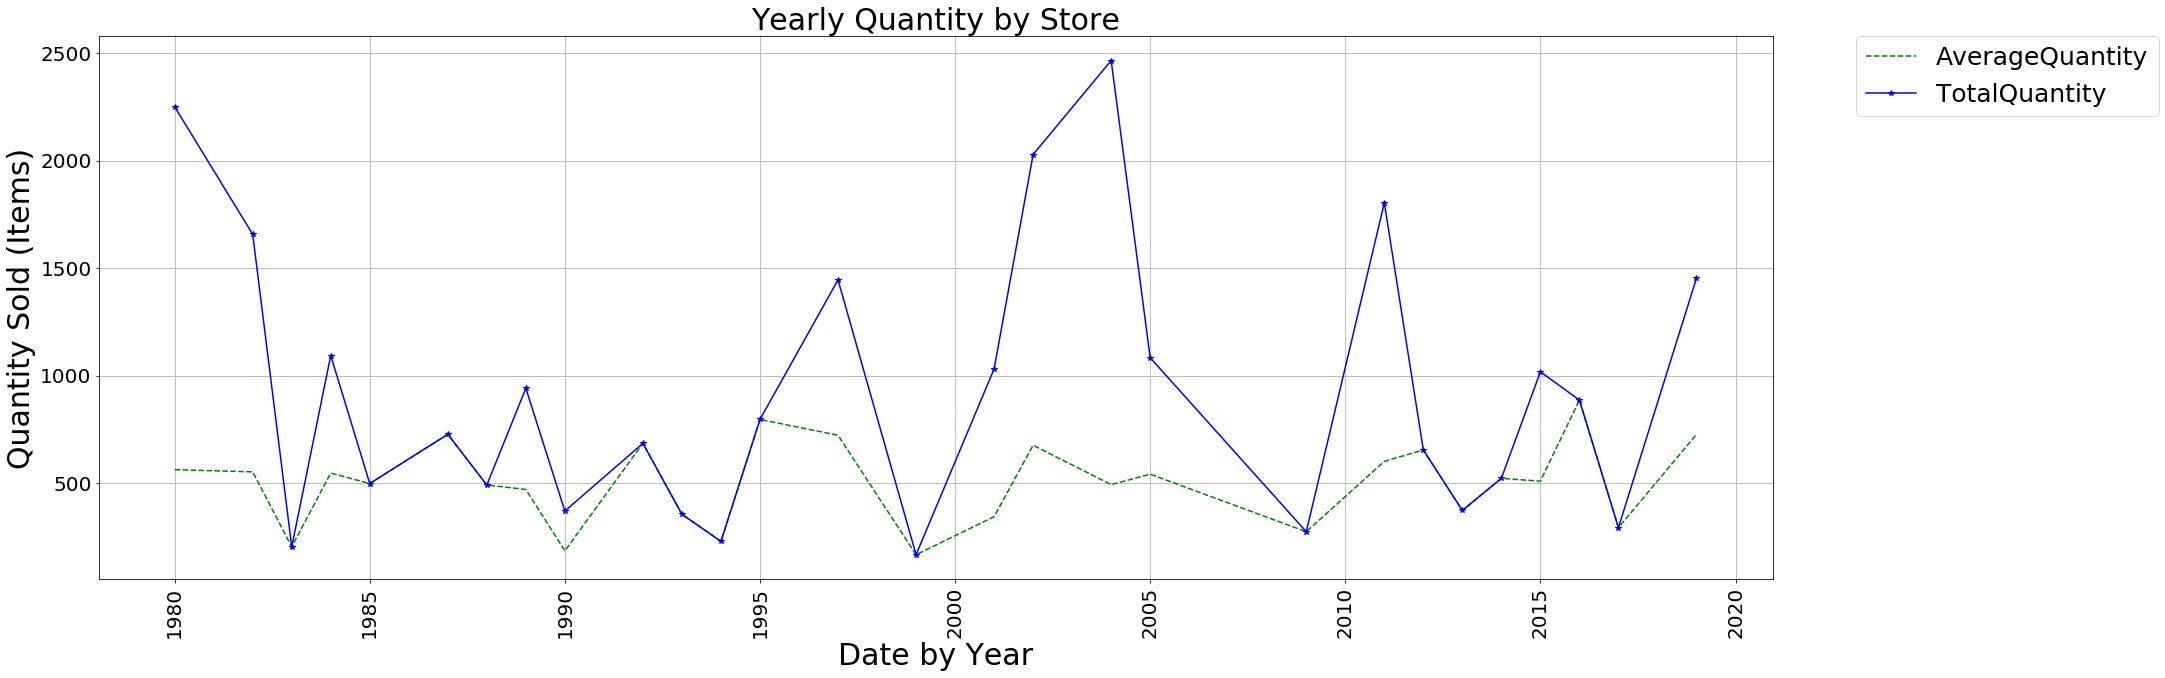

In [24]:
# Create year-month date column
qty_store = deepcopy(sales)
qty_store["DateByMonth"] = qty_store["year"].apply(str) + "-" + qty_store["month"].apply(str)

# Mean aggregation of store quantity sold by month and by year
column_names = {"SoldQty":{"AverageQty":np.mean, "TotalQty":np.sum}}
store_qty_month = qty_store[["DateByMonth","SoldQty"]].groupby(["DateByMonth"], as_index=False).agg(column_names)
store_qty_year = qty_store[["year","SoldQty"]].groupby(["year"], as_index=False).agg(column_names)

# Remove hierarchical index after aggregation
store_qty_month.columns = [index2 if index2 else index1 for index1, index2 in store_qty_month.columns]
store_qty_year.columns = [index2 if index2 else index1 for index1, index2 in store_qty_year.columns]

# Time Series Plot
plt.figure(figsize=(30,10))
titles = ['Monthly Quantity by Store', 'Yearly Quantity by Store']
xlabels = ['Date by Month', 'Date by Year']
for i, dataset in enumerate([store_qty_month, store_qty_year]):
    
    plt.figure(figsize=(30,10))
    plt.grid(True)
    plt.plot(dataset.iloc[:,0], dataset.iloc[:,1], 'g--', label='AverageQuantity')
    plt.plot(dataset.iloc[:,0], dataset.iloc[:,2], 'b-*', label='TotalQuantity')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=25)
    plt.title(titles[i], size=30)
    plt.ylabel('Quantity Sold (Items)', size=30)
    plt.xlabel(xlabels[i], size=30)
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()
    

'''
#### Findings:
#### Looking at 1st Figure: Monthly Quantity by Store: 
#### (1) We can find an obvious cyclical peak around February to March. This shows seasonality. The possible reason is that February and March is near Chinese New Year promotional month.
#### Looking at 1st Figure: Yearly Quantity by Store: 
#### (1) Yearly trend on average quantity is somewhat stable, but total quantity is rather fluctuating.
#### We have to use time-series decomposion visualization technique. I show them in the next block.
'''

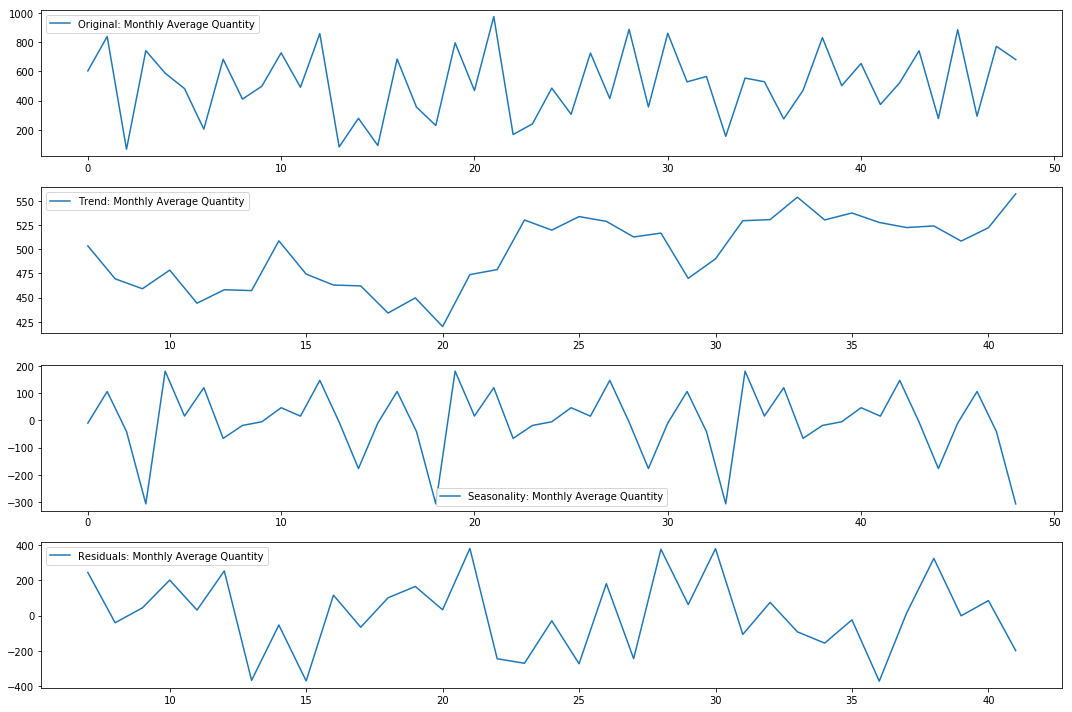

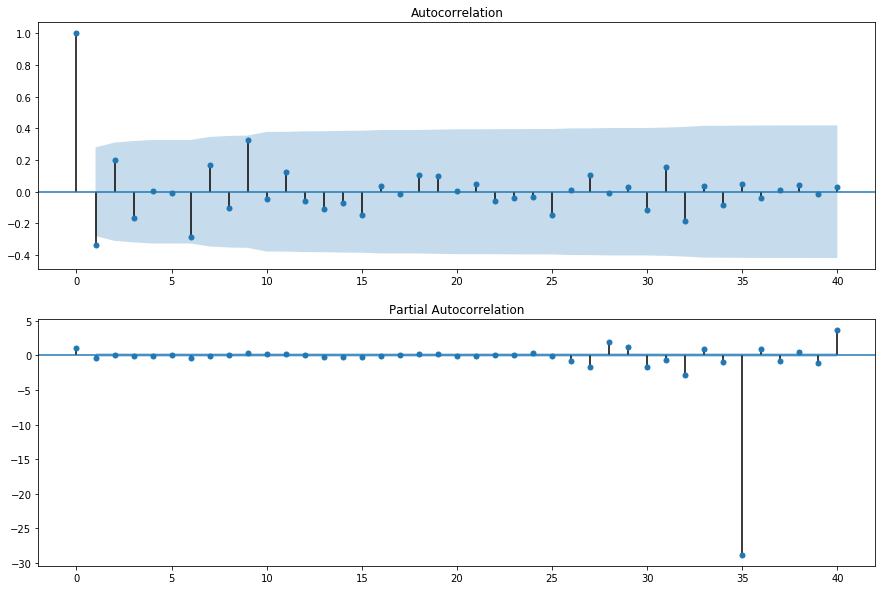

In [25]:
# Decomposition of monthly average quantity data
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(list(store_qty_month['AverageQty']), freq=15)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(15,10))
plt.title("Decomposition of Monthly Average Quantity")
plt.subplot(411)
plt.plot(store_qty_month['AverageQty'], label='Original: Monthly Average Quantity')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend: Monthly Average Quantity')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality: Monthly Average Quantity')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals: Monthly Average Quantity')
plt.legend(loc='best')
plt.tight_layout()

plt.figure(figsize=(15,10))
ax1 = plt.subplot(211)
fig = sm.graphics.tsa.plot_acf(store_qty_month['AverageQty'].squeeze(), lags=40, ax=ax1)
ax2 = plt.subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_qty_month['AverageQty'].squeeze(), lags=40, ax=ax2)

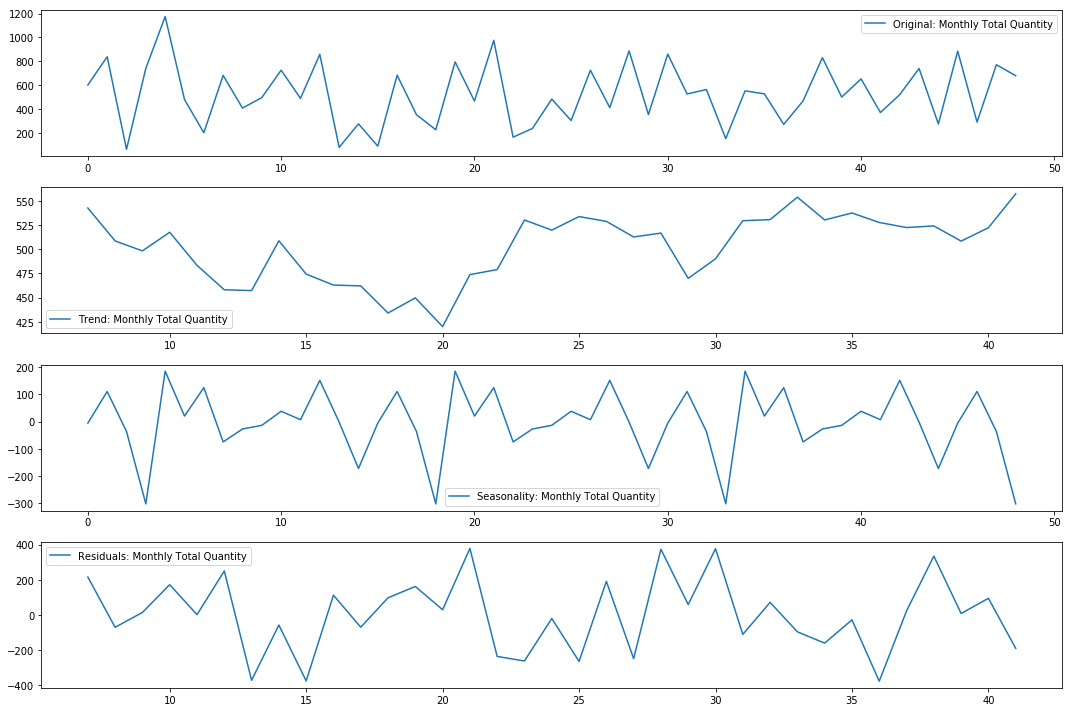

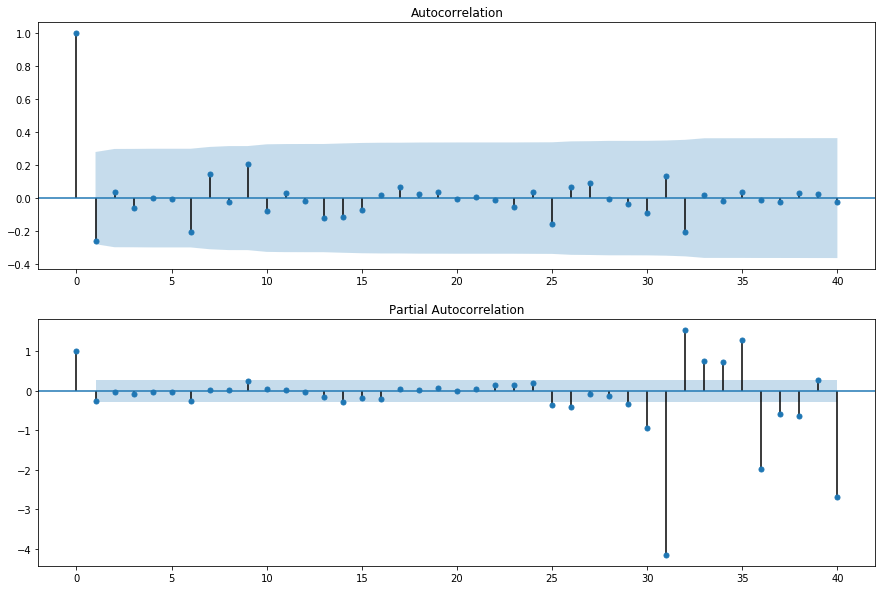

In [26]:
# Decomposition of monthly total quantity data
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(list(store_qty_month['TotalQty']), freq=15)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the components
plt.figure(figsize=(15,10))
plt.title("Decomposition of Monthly Total Quantity")
plt.subplot(411)
plt.plot(store_qty_month['TotalQty'], label='Original: Monthly Total Quantity')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend: Monthly Total Quantity')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality: Monthly Total Quantity')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals: Monthly Total Quantity')
plt.legend(loc='best')
plt.tight_layout()

plt.figure(figsize=(15,10))
ax1 = plt.subplot(211)
fig = sm.graphics.tsa.plot_acf(store_qty_month['TotalQty'].squeeze(), lags=40, ax=ax1)
ax2 = plt.subplot(212)
fig = sm.graphics.tsa.plot_pacf(store_qty_month['TotalQty'].squeeze(), lags=40, ax=ax2)

'''
#### Findings:
#### The shape of monthly average quantity data and monthly total quantity data are almost the same, because in this raw dataset, there is almost no repeated observations for each item or each store: 
#### (1) Similarly, the seasonality is still very obvious, the same pattern will repeat every 12 months, so it means 12-month is a cyclic period.
#### (2) Autocorrelation in lag values is not significant, and Heteroskedasticity (i.e., changing variance) is not obvious in this case.
'''

<div class="alert alert-success">
<b>Step 3.3: Average Sales Price by month and by year </b>
</div>

In [27]:
# Create year-month date column
price_store = deepcopy(sales)
price_store["DateByMonth"] = price_store["year"].apply(str) + "-" + price_store["month"].apply(str)

# Mean aggregation of store quantity sold by month and by year
column_names = {"TotalSales":{"AverageSales":np.mean, "TotalSales":np.sum}, "SoldQty":{"AverageQty":np.mean, "TotalQty":np.sum}}
store_price_month = price_store[["DateByMonth","TotalSales","SoldQty"]].groupby(["DateByMonth"], as_index=False).agg(column_names)
store_price_year = price_store[["year","TotalSales","SoldQty"]].groupby(["year"], as_index=False).agg(column_names)

# Remove hierarchical index after aggregation
store_price_month.columns = [index2 if index2 else index1 for index1, index2 in store_price_month.columns]
store_price_year.columns = [index2 if index2 else index1 for index1, index2 in store_price_year.columns]

# Average Sales Price by month and by year
store_price_month['MonthlyAverageSalesPrice'] = store_price_month['TotalSales'] / store_price_month['TotalQty']
store_price_year['YearlyAverageSalesPrice'] = store_price_year['TotalSales'] / store_price_year['TotalQty']    

<Figure size 2160x720 with 0 Axes>

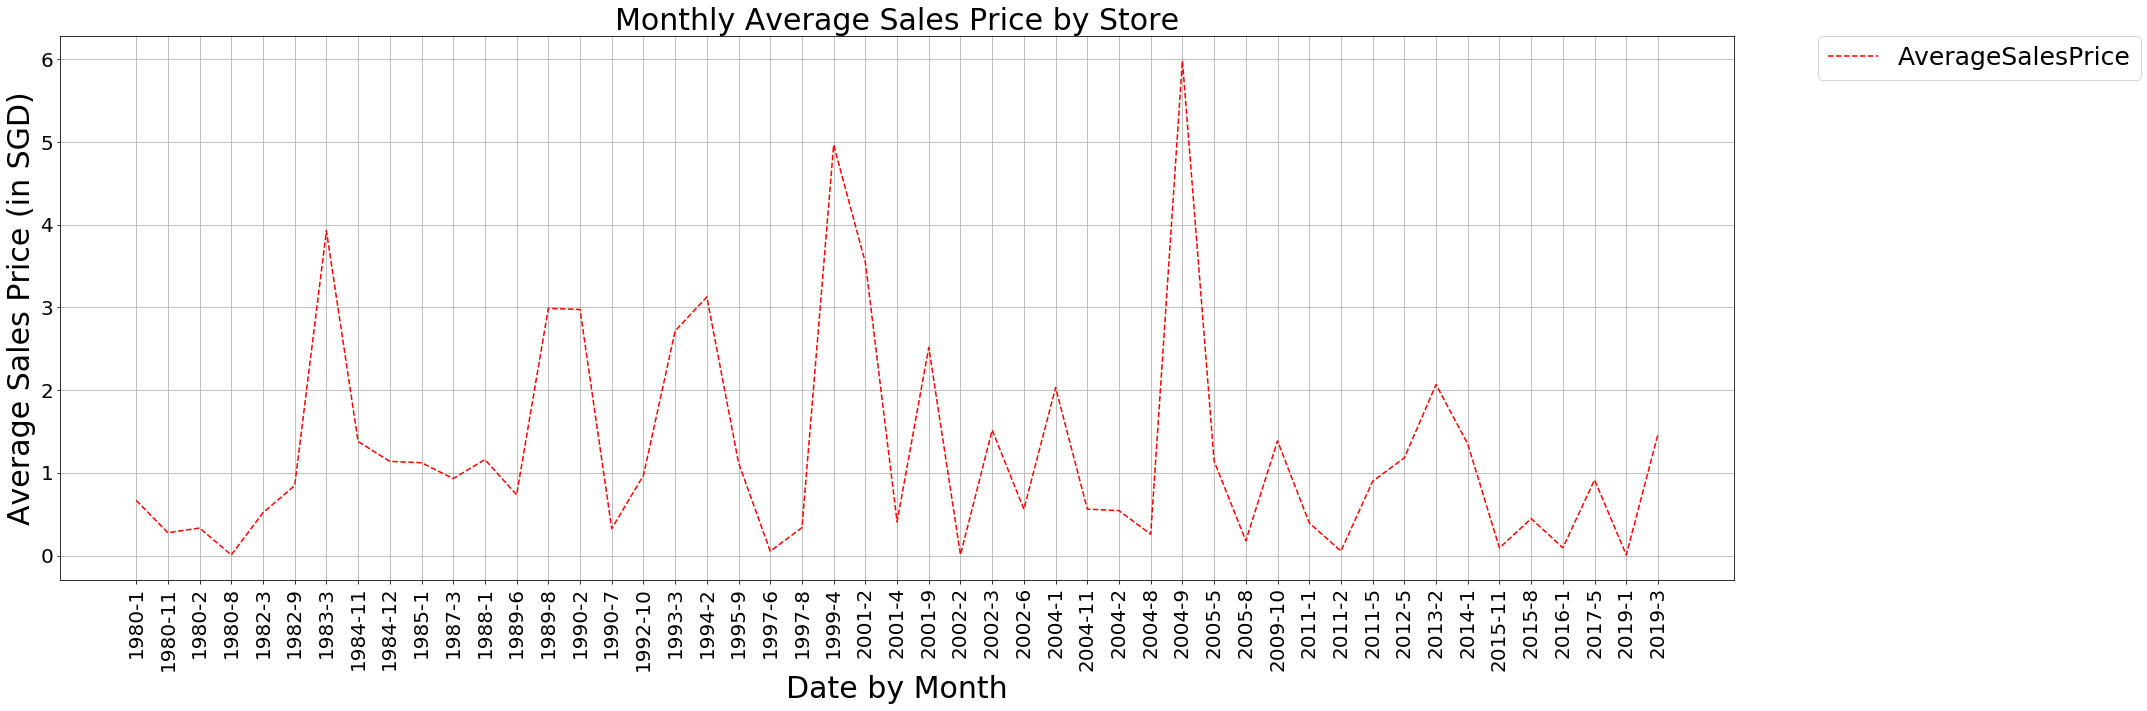

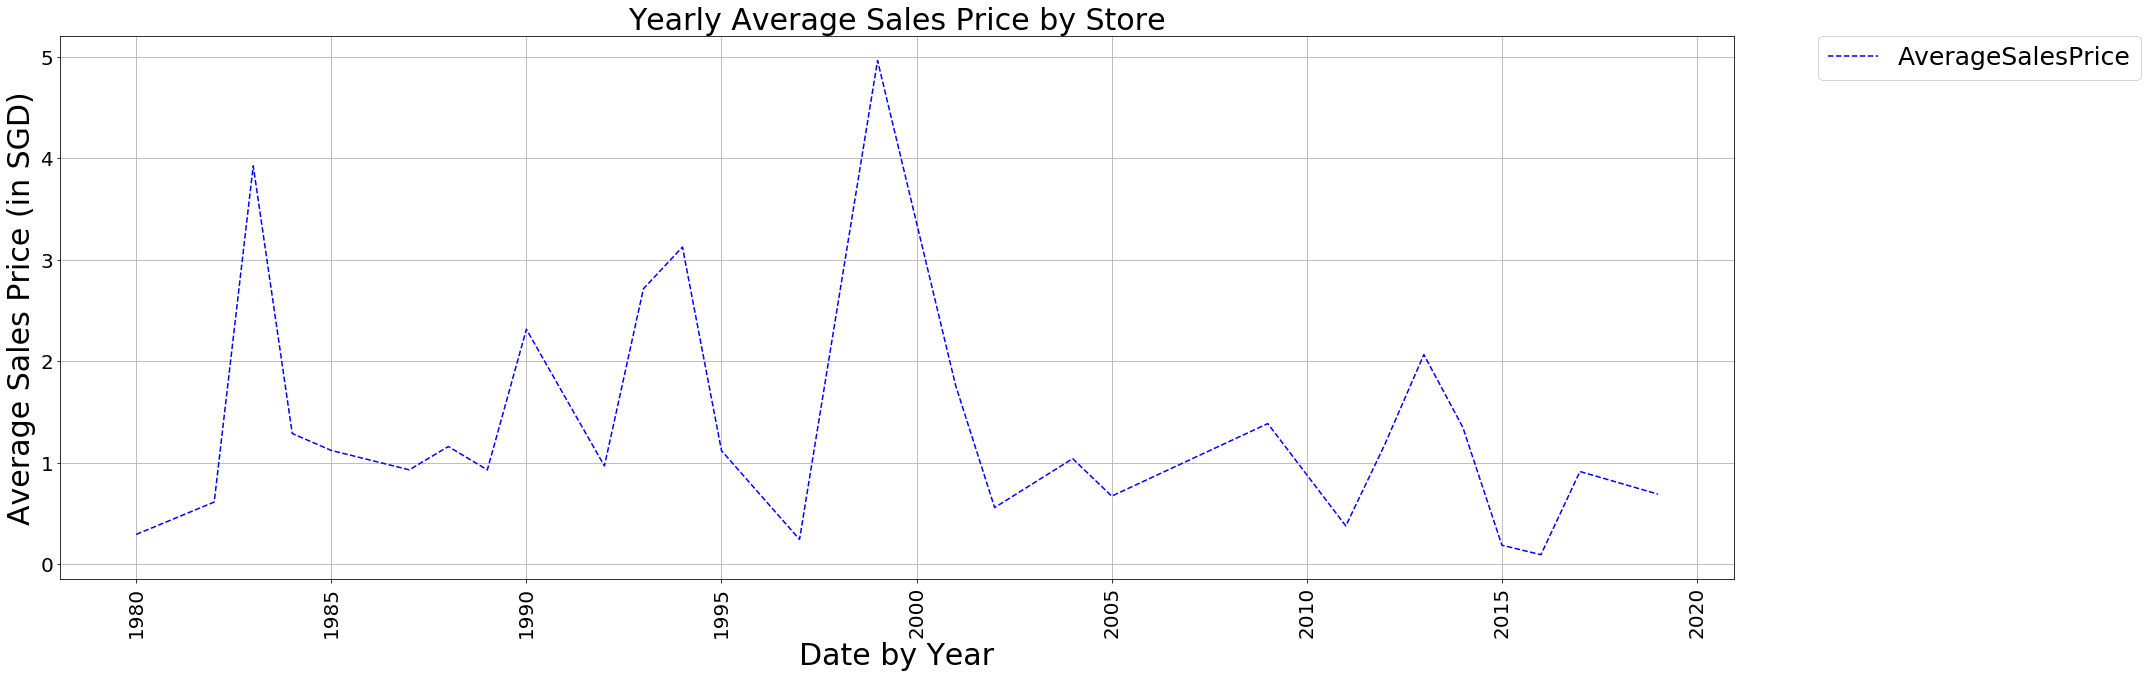

In [28]:
# Time Series Plot
plt.figure(figsize=(30,10))
titles = ['Monthly Average Sales Price by Store', 'Yearly Average Sales Price by Store']
colors = ['r--', 'b--']
xlabels = ['Date by Month', 'Date by Year']
for i, dataset in enumerate([store_price_month, store_price_year]):
    
    plt.figure(figsize=(30,10))
    plt.grid(True)
    plt.plot(dataset.iloc[:,0], dataset.iloc[:,5], colors[i], label='AverageSalesPrice')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=25)
    plt.title(titles[i], size=30)
    plt.ylabel('Average Sales Price (in SGD)', size=30)
    plt.xlabel(xlabels[i], size=30)
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()

'''
#### Findings:
#### Generally speaking, the average sales price is fluctuating in both monthly level and yearly level. 
'''

<div class="alert alert-success">
<b>Step 3.4: Find top 5 stores and bottom 5 stores (The others are normal stores), in terms their sales share and quantity share. What is the percentage share of these stores? Do they satisfy power-law theory or long-tail distribution?</b>
</div>

In [29]:
# Find top5 and bottom5 stores in terms of total sales and total quantity
store_by_sales = sales.sort_values(by=['TotalSales'], ascending=False)
top5_sales_storeid = store_by_sales.iloc[0:5]['ShopID'].values
bottom5_sales_storeid = store_by_sales.iloc[-5:]['ShopID'].values
store_by_sales['StoreCategory'] = store_by_sales['ShopID'].map(lambda x: 'Top5' if x in top5_sales_storeid else ('Bottom5' if x in bottom5_sales_storeid else 'Normal'))

store_by_qty = sales.sort_values(by=['SoldQty'], ascending=False)
top5_qty_storeid = store_by_qty.iloc[0:5]['ShopID'].values
bottom5_qty_storeid = store_by_qty.iloc[-5:]['ShopID'].values
store_by_qty['StoreCategory'] = store_by_qty['ShopID'].map(lambda x: 'Top5' if x in top5_qty_storeid else ('Bottom5' if x in bottom5_qty_storeid else 'Normal'))

In [30]:
# Sales share and quantity share of each store
store_by_sales['SalesShareByStore'] = (store_by_sales['TotalSales'] / store_by_sales['TotalSales'].sum()) * 100
store_by_qty['QtyShareByStore'] = (store_by_qty['SoldQty'] / store_by_qty['SoldQty'].sum()) * 100

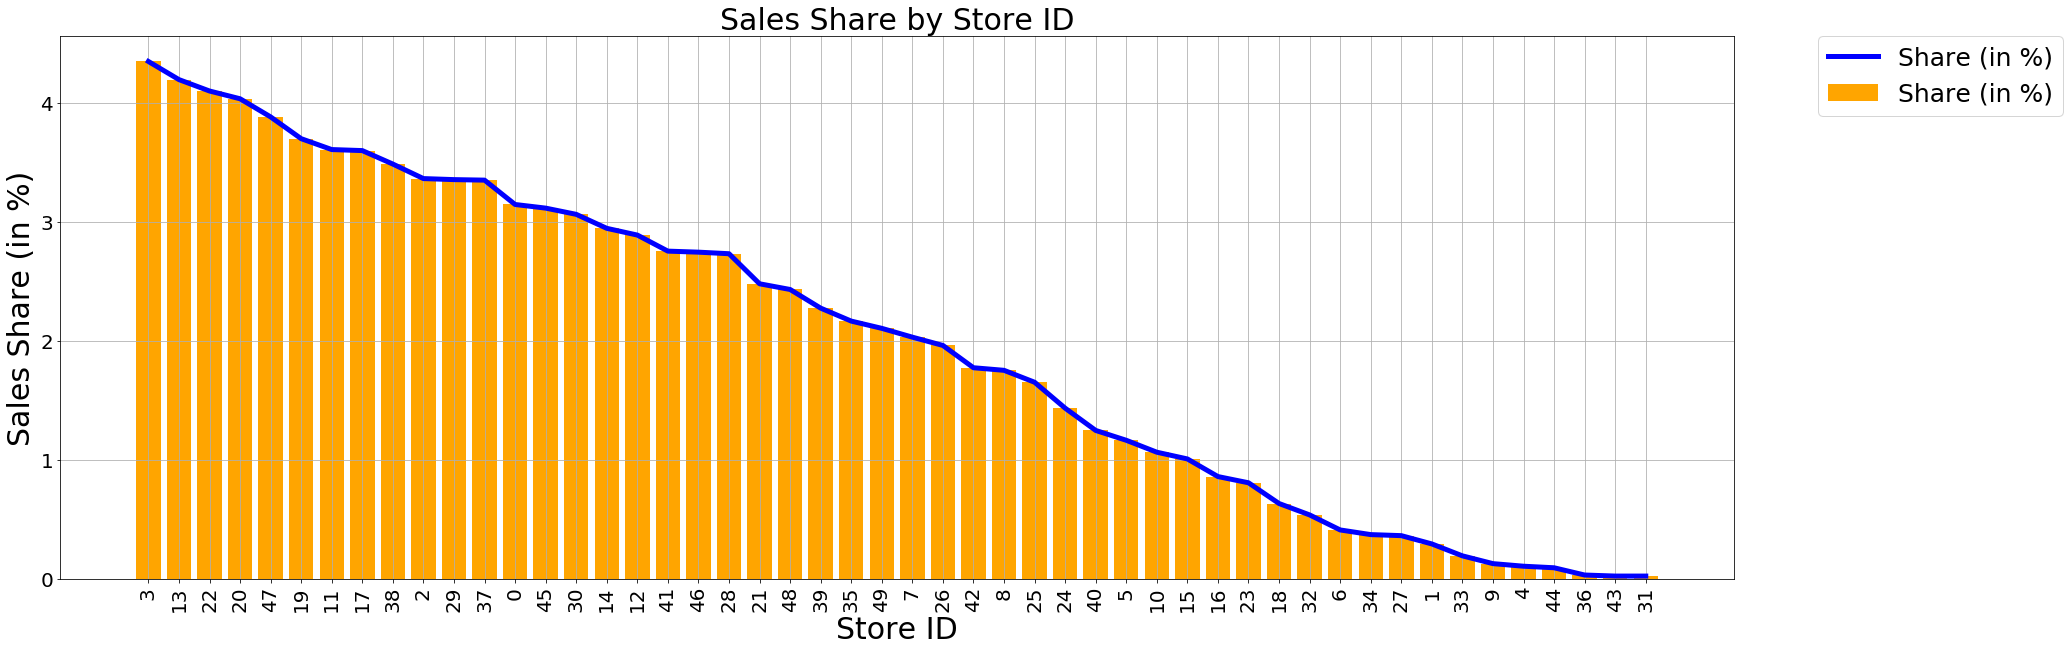

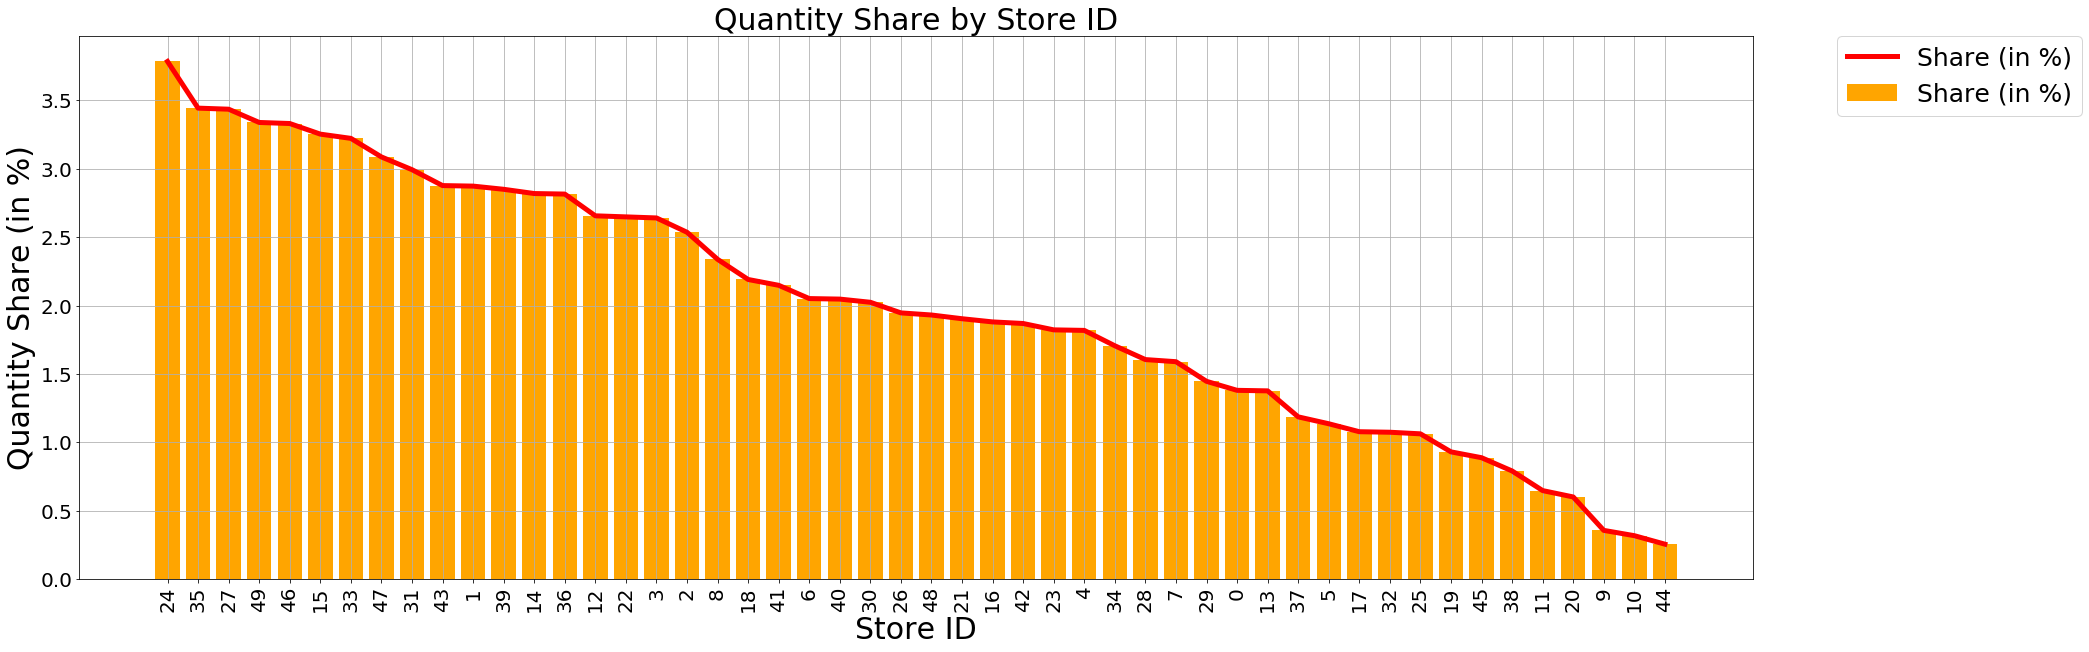

In [31]:
# Distribution of sales share and quantity share of each store
colors = ['blue','red','orange']
performance = ['SalesShareByStore', 'QtyShareByStore']
titles = ['Sales Share by Store ID', 'Quantity Share by Store ID']
ylabels = ['Sales Share (in %)', 'Quantity Share (in %)']
for i, dataset in enumerate([store_by_sales, store_by_qty]):
    # Plot the bar chart
    plt.figure(figsize=(30,10))
    plt.grid(True)
    plt.bar(dataset['ShopID'].astype(str), dataset[performance[i]], color=colors[2], label='Share (in %)')
    plt.plot(dataset['ShopID'].astype(str), dataset[performance[i]], color=colors[i], label='Share (in %)', linewidth=5)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=25)
    plt.title(titles[i], size=30)
    plt.ylabel(ylabels[i], size=30)
    plt.xlabel('Store ID', size=30)
    plt.xticks(rotation=90, fontsize=20)
    plt.yticks(fontsize=20)
    plt.show()


'''
#### Findings:
#### Generally speaking, the long-tail distribution pattern (i.e., power-law) exists in store sales and quantity sold. We can see that top5 stores account for most of the shares, while bottom5 stores almost make minimal contributions to the company sales.
'''

In [32]:
# Make a more dynamic and interactive bar charts
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)

trace0 = go.Bar(
    x=store_by_sales['ShopID'],
    y=store_by_sales['SalesShareByStore'],
    name='Share (in %)',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Scatter(
    x=store_by_sales['ShopID'],
    y=store_by_sales['SalesShareByStore'],
    mode = 'lines+markers',
    name = 'Share (in %)'
)

trace = [trace0, trace1]
layout = go.Layout(
    xaxis=dict(tickangle=-45, type='category'),
    barmode='group',
    title=go.layout.Title(
        text='Sales Share by Store ID (in %)',
        xref='paper',
        x=0
    )
)

fig = go.Figure(data=trace, layout=layout)
py.offline.iplot(fig)

In [33]:
# Make a more dynamic and interactive bar charts
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)

trace0 = go.Bar(
    x=store_by_qty['ShopID'],
    y=store_by_qty['QtyShareByStore'],
    name='Share (in %)',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Scatter(
    x=store_by_qty['ShopID'],
    y=store_by_qty['QtyShareByStore'],
    mode = 'lines+markers',
    name = 'Share (in %)'
)

trace = [trace0, trace1]
layout = go.Layout(
    xaxis=dict(tickangle=-45, type='category'),
    barmode='group',
    title=go.layout.Title(
        text='Quantity Share by Store ID (in %)',
        xref='paper',
        x=0
    )
)

fig = go.Figure(data=trace, layout=layout)
py.offline.iplot(fig)

In [34]:
# Pie chart to show the exact contributions of Top5, Bottom5 and Normal stores
column_names1 = {"SalesShareByStore":{"SalesShareByStore":np.sum}}
column_names2 = {"QtyShareByStore":{"QtyShareByStore":np.sum}}
store_category_sales = store_by_sales[["StoreCategory", "SalesShareByStore"]].groupby(["StoreCategory"], as_index=False).agg(column_names1) 
store_category_qty = store_by_qty[["StoreCategory", "QtyShareByStore"]].groupby(["StoreCategory"], as_index=False).agg(column_names2) 
store_category_sales.columns = [index2 if index2 else index1 for index1, index2 in store_category_sales.columns]
store_category_qty.columns = [index2 if index2 else index1 for index1, index2 in store_category_qty.columns]

D:\Anaconda3\lib\site-packages\pandas\core\groupby\generic.py:1315: FutureWarning:

using a dict with renaming is deprecated and will be removed in a future version



In [35]:
store_category_sales

,StoreCategory,SalesShareByStore
0,Bottom5,0.291875
1,Normal,79.128730
2,Top5,20.579394


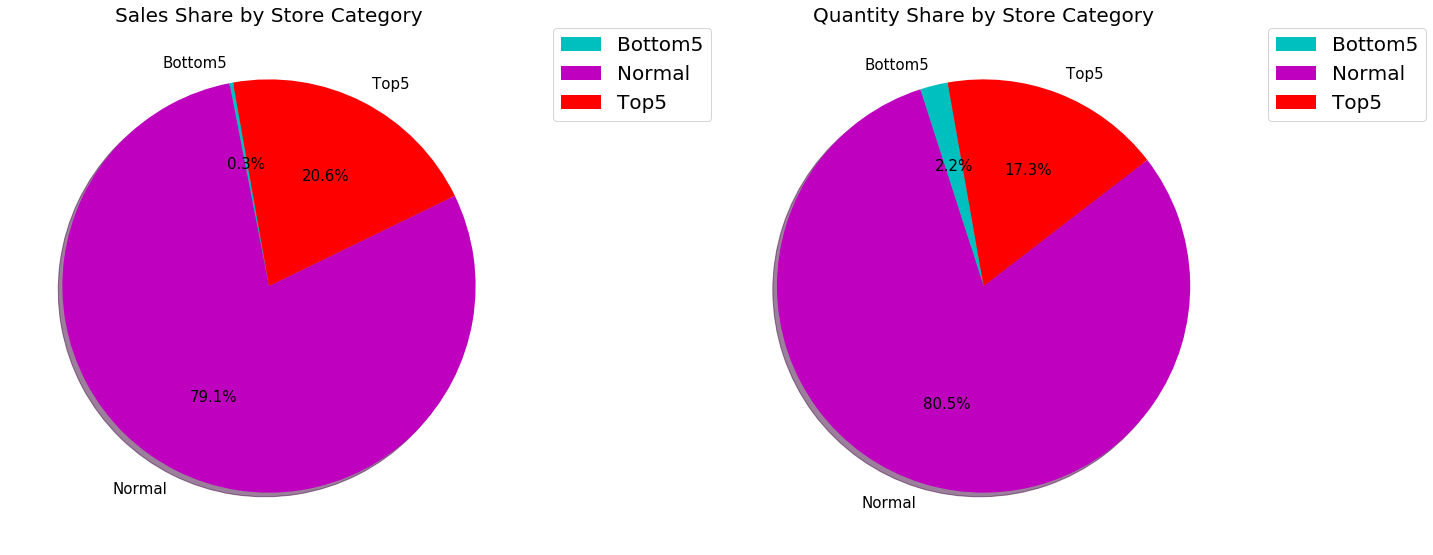

In [36]:
# Pie chart to show the exact contributions of Top5, Bottom5 and Normal stores
colors = ['c','m','r']
performance = ['SalesShareByStore', 'QtyShareByStore']
titles = ['Sales Share by Store Category', 'Quantity Share by Store Category']
plt.figure(figsize=(20,20))
for i, dataset in enumerate([store_category_sales,store_category_qty]):
    # Plot the pie chart 
    plt.subplot(121+i)    
    plt.pie(dataset[performance[i]], colors=colors, labels=dataset['StoreCategory'].values, startangle=100, shadow=True, autopct='%1.1f%%', textprops={'fontsize': 15})
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=20)
    #plt.legend()
    plt.title(titles[i], size=20)

plt.tight_layout()

'''
#### Findings:
#### It is obvious that top5 stores already account for 20% of shares, while bottom5 stores almost make minimal contributions to the company sales (only lower than 3%).
'''

In [37]:
# Make a more dynamic and interactive pie charts
import plotly as py
import plotly.graph_objs as go
py.offline.init_notebook_mode(connected=True)

fig = {
  "data": [
    {
      "values": store_category_sales['SalesShareByStore'].values,
      "labels": store_category_sales['StoreCategory'].values,
      #"text":["Sales"],
      "textposition":"inside",
      "domain": {"column": 0},
      "name": "Sales Share",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": store_category_qty['QtyShareByStore'].values,
      "labels": store_category_qty['StoreCategory'].values,
      #"text":["Qty"],
      "textposition":"inside",
      "domain": {"column": 1},
      "name": "Qty Share",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"Share by Store Category",
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Sales",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "Qty",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
#fig = go.Figure(data=trace, layout=layout)
py.offline.iplot(fig)

<div class="alert alert-success">
<b>Step 3.5: Will performance metrics (sales and quantity) be different among top-5, bottom-5, and normal stores, during weekend v.s. non-weekend?</b>
</div>

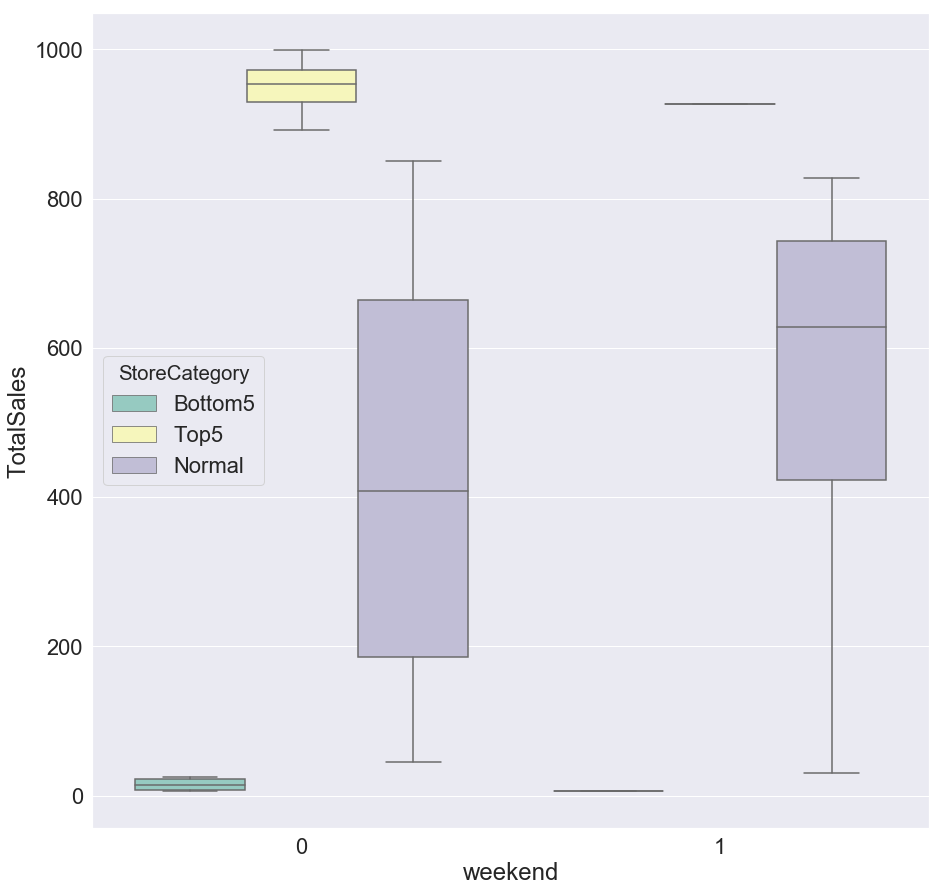

In [38]:
# Box-bar plot 
plt.figure(figsize=(15,15))
sns.set(font_scale=2) 
store_by_sales_weekend = store_by_sales.sort_values(by=['weekday'])
sns.boxplot(x='weekend', y='TotalSales', hue='StoreCategory', data=store_by_sales_weekend, palette='Set3')

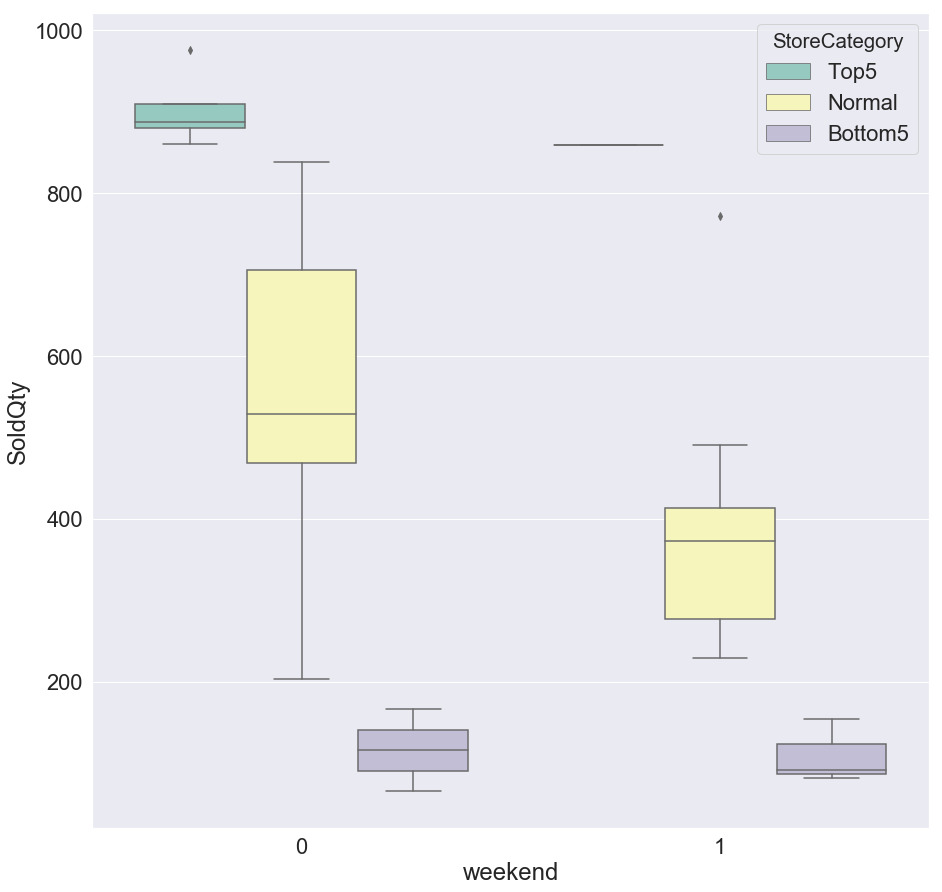

In [39]:
# Box-bar plot 
plt.figure(figsize=(15,15))
sns.set(font_scale=2) 
store_by_qty_weekend = store_by_qty.sort_values(by=['weekday'])
sns.boxplot(x='weekend', y='SoldQty', hue='StoreCategory', data=store_by_qty_weekend, palette='Set3')

'''
#### Findings:
#### (1) On average, top5 stores sell more and gain more sales than normal stores and bottom5 stores.
#### (2) For normal stores, sales are higher during weekend but quantity sold is lower, meaning that average sales price is higher during weekend. This implies that consumers prefer to buy high-priced items during weekend, and prefer to buy low-priced items (e.g., FMCG goods) during non-weekend days. We need to notice this consumer habit and set promotion strategies with correct timing.
'''

<div class="alert alert-success">
<b>Step 3.6: Will performance metrics (sales and quantity) be different among top-5, bottom-5, and normal stores, during public-holiday month v.s. non-public-holiday month?</b>
</div>

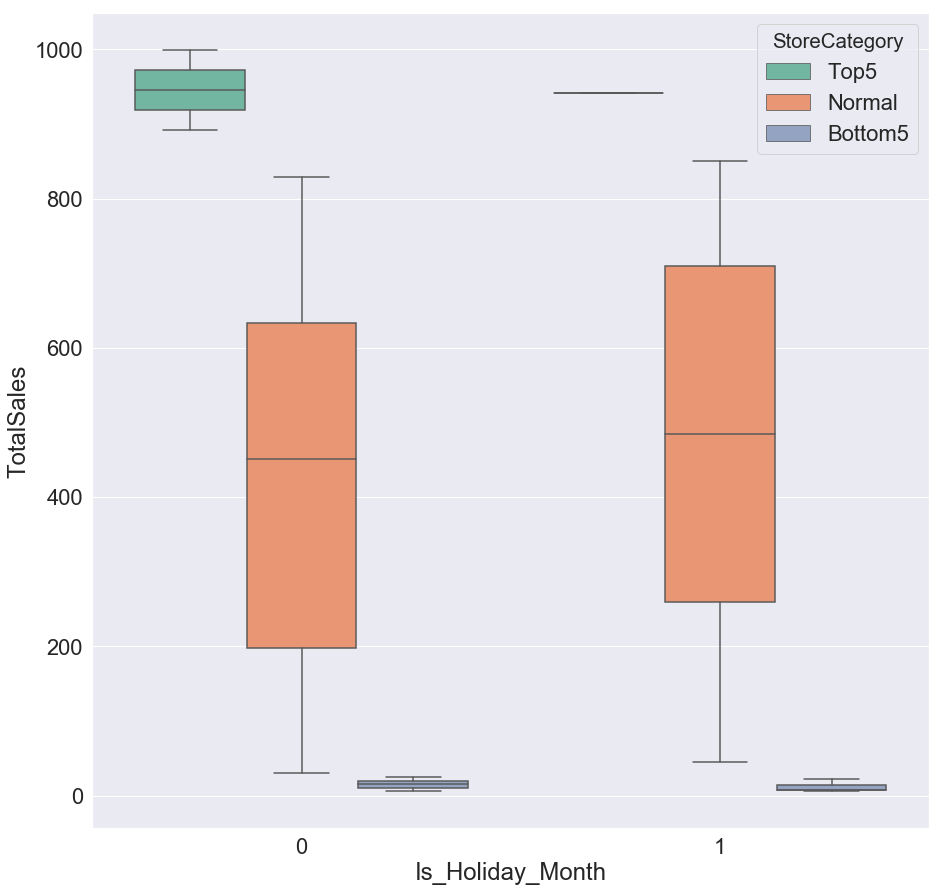

In [40]:
# Box-bar plot 
plt.figure(figsize=(15,15))
sns.set(font_scale=2) 
store_by_sales_holiday = store_by_sales.sort_values(by=['Is_Holiday_Month'])
sns.boxplot(x='Is_Holiday_Month', y='TotalSales', hue='StoreCategory', data=store_by_sales_holiday, palette='Set2')

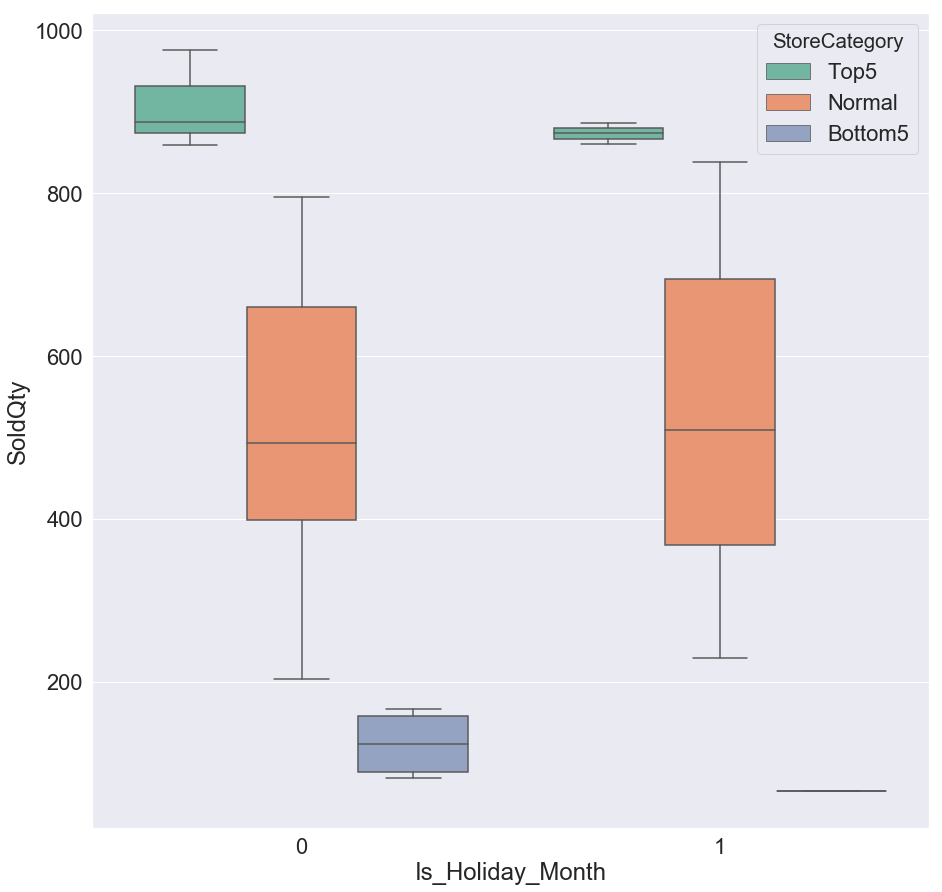

In [41]:
# Box-bar plot 
plt.figure(figsize=(15,15))
sns.set(font_scale=2) 
store_by_qty_holiday = store_by_qty.sort_values(by=['Is_Holiday_Month'])
sns.boxplot(x='Is_Holiday_Month', y='SoldQty', hue='StoreCategory', data=store_by_qty_holiday, palette='Set2')

'''
#### Findings:
#### (1) On average, top5 stores and bottom5 stores sell more and gain higher sales during non-holiday month, while normal stores sell more and gain higher sales during public-holiday month. It seems that normal stores benefit more from holiday-month promotions.
'''